# Домашнее задание №4. Логистическая регрессия. Оптимизация. Подбор гиперпараметров

## Ф.И.О: Маслак Иван Александрович

По вопросам в задании писать в беседу курса или в лс (tg: @Skorik_S)

## Задание 1: Теоретическая часть

Постановка задачи логистической регрессии:
$$
    \mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) → \min_{θ \in \mathbb{R}^d}, \tag{1}
$$

в которой


1.   $θ \in \mathbb{R}^d$ - вектор параметров модели.
2.   $(x_i, y_i)$ - обучающая пара. В данной постановке $y = \{-1, 1\}$.



### Задача 0 (0.5 балла)

1. *Получите постановку логистической регрессии, используя принцип максимума правдоподобия в предположении $y = \{0, 1\}$.*
2. Проверьте, что если метки классов $y = \{-1, 1\}$, то полученная постановка примет вид (1).
---

#### Ваше решение:

---
### **Метки 1 и 0**


В логистической регрессии для $ y_i \in \{0, 1\} $ моделируем:

$$
P(y_i = 1 \mid x_i; \theta) = \sigma(\langle \theta, x_i \rangle) = \frac{1}{1 + e^{-\langle \theta, x_i \rangle}}
$$
$$
P(y_i = 0 \mid x_i; \theta) = 1 - \sigma(\langle \theta, x_i \rangle) = \frac{1}{1 + e^{\langle \theta, x_i \rangle}}
$$

Тогда в общем виде:

$$
P(y_i \mid x_i; \theta) = \sigma(\langle \theta, x_i \rangle)^{y_i} \cdot \left[1 - \sigma(\langle \theta, x_i \rangle)\right]^{1 - y_i}
$$

Логарифмическое правдоподобие:

$$
L(\theta) = \sum_{i=1}^N \log{P(y_i \mid x_i; \theta)} = \sum_{i=1}^N \left[ y_i \log \sigma(\langle \theta, x_i \rangle) + (1 - y_i) \log \left(1 - \sigma(\langle \theta, x_i \rangle)\right) \right]
$$

Подставим сигмоиду

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad 1 - \sigma(z) = \frac{1}{1 + e^{z}}
$$

$$
\log \sigma(z) = -\log(1 + e^{-z}), \quad \log (1 - \sigma(z)) = -\log(1 + e^{z})
$$

$$
L(\theta) = \sum_{i=1}^N \left[ y_i \left( -\log(1 + e^{-\langle \theta, x_i \rangle}) \right) + (1 - y_i) \left( -\log(1 + e^{\langle \theta, x_i \rangle}) \right) \right]
$$

$$
L(\theta) = - \sum_{i=1}^N \left[ y_i \log(1 + e^{-\langle \theta, x_i \rangle}) + (1 - y_i) \log(1 + e^{\langle \theta, x_i \rangle}) \right]
$$

Тогда

$$
\max_\theta \ell(\theta) \quad \Leftrightarrow \quad \min_\theta \left[ \sum_{i=1}^N y_i \log(1 + e^{-\langle \theta, x_i \rangle}) + (1 - y_i) \log(1 + e^{\langle \theta, x_i \rangle}) \right]
$$

В итоге получаем:

$$
\boxed{
\mathcal{L}(\theta, X, y) = \frac{1}{N} \sum_{i=1}^N \left[ y_i \log\left(1 + e^{-\langle\theta, x_i\rangle}\right) + (1 - y_i) \log\left(1 + e^{\langle\theta, x_i\rangle}\right) \right]
}
$$
где $ y_i \in \{0, 1\} $.

### **Метки 1 и -1**
---

Проведём преобразование меток, переводящее 0 в -1 и 1 в 1:
$$
z_i = 2y_i - 1, \quad y_i = \frac{z_i + 1}{2}
$$
Тогда:

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N \left[ \frac{z_i + 1}{2} \log(1 + e^{-\langle\theta, x_i\rangle}) + \left(1 - \frac{z_i + 1}{2}\right) \log(1 + e^{\langle\theta, x_i\rangle}) \right]
$$
$$
= \frac{1}{N} \sum_{i=1}^N \left[ \frac{z_i + 1}{2} \log(1 + e^{-\langle\theta, x_i\rangle}) + \frac{1 - z_i}{2} \log(1 + e^{\langle\theta, x_i\rangle}) \right]
$$

Подставим значения:
- $z_i = 1$:
$$
\mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N \log(1 + e^{-\langle\theta, x_i\rangle}) = \frac{1}{N} \sum_{i=1}^N \log(1 + e^{-z_i \langle\theta, x_i\rangle})
$$

- $z_i = -1$

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum_{i=1}^N \log(1 + e^{\langle\theta, x_i\rangle}) = \frac{1}{N} \sum_{i=1}^N \log(1 + e^{-z_i \langle\theta, x_i\rangle})
$$

Таким образом, получена формула в виде (1).

### Задача 1* (2 балла)

1. Покажите, что градиент функции потерь равен:

$$\nabla \mathcal{L}(\theta, X, y) = - \dfrac{1}{N}\sum_{i=1}^N \dfrac{y_i x_{i}e^{-y_i\langle\theta, x_i\rangle}}{1 + e^{-y_i\langle\theta, x_i\rangle}}. $$

2. Покажите, что гессиан функции потерь равен:

$$ \nabla^2 \mathcal{L}(\theta, X, y) = \dfrac{1}{N}X^\top D X, \tag{2}$$
где $D$ - диагональная матрица с элементами $\sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))$, где $\sigma(\cdot)$ - функция сигмоиды

---

#### Ваше решение:*

---
### **Градиент функции потерь**

Имеем функцию потерь:
$$
\mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle})
$$

Рассмотрим $i$-е слагаемое:
$$
\ell_i(\theta) = \log(1 + e^{-y_i\langle\theta, x_i\rangle})
$$

Градиент по $\theta$:
$$
\nabla \ell_i(\theta) = \frac{1}{1 + e^{-y_i \langle\theta, x_i\rangle}} \cdot e^{-y_i \langle\theta, x_i\rangle} \cdot (-y_i) \cdot \nabla \langle\theta, x_i\rangle
$$

Учитывая, что $\nabla \langle\theta, x_i\rangle = x_i$, получаем:
$$
\nabla \ell_i(\theta) = -\frac{y_i e^{-y_i \langle\theta, x_i\rangle}}{1 + e^{-y_i \langle\theta, x_i\rangle}} x_i
$$

Итоговый градиент:
$$
\nabla \mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N \nabla \ell_i(\theta) = -\dfrac{1}{N}\sum_{i=1}^N \dfrac{y_i e^{-y_i\langle\theta, x_i\rangle}}{1 + e^{-y_i\langle\theta, x_i\rangle}}x_{i}
$$

---

### **Гессиан функции потерь**

Обозначим $u_i = -y_i\langle\theta, x_i\rangle$, тогда:
$$
\nabla \ell_i(\theta) = -\dfrac{y_i e^{u_i}}{1 + e^{u_i}} x_i
$$

Заметим, что $\dfrac{e^{u_i}}{1 + e^{u_i}} = \sigma(u_i)$

Таким образом:
$$
\nabla \ell_i(\theta) = -y_i \sigma(u_i) x_i = -y_i \sigma(-y_i\langle\theta, x_i\rangle) x_i
$$

Отсюда
$$
\nabla^2 \ell_i(\theta) = \nabla \left(-y_i \sigma(u_i) x_i\right) = -y_i \sigma'(u_i) \cdot (\nabla u_i) x_i^\top= -y_i \sigma'(u_i) \cdot (-y_i x_i) x_i^\top = y_i^2 \sigma'(u_i) x_i x_i^\top = y_i^2 \sigma(u_i)(1 - \sigma(u_i)) x_i x_i^\top
$$


Гессиан функции потерь
$$
\nabla^2 \mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N \nabla^2 \ell_i(\theta) = \dfrac{1}{N}\sum_{i=1}^N \sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle)) x_i x_i^\top
$$

Обозначим $D$ - диагональная матрица с элементами:
$$
D_{ii} = \sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))
$$

Итоговая запись:
$$
\nabla^2 \mathcal{L}(\theta, X, y) = \dfrac{1}{N}X^\top D X
$$

### Задача 2* (1 балл)

1. Покажите что в выражении (2) $\nabla^2\mathcal{L} \succeq 0$. Что это говорит об $\mathcal{L}$ и её экстремумах?

2. В каких случаях в выражении (2) $\nabla^2\mathcal{L} \succ 0$? Что в этом случае мы можем сказать о глобальном минимуме? Всегда ли он существует? Ответ обоснуйте.

---

#### Ваше решение:*

---
### 1. Неотрицательная определённость

Гессиан:
$$
\nabla^2 \mathcal{L}(\theta, X, y) = \dfrac{1}{N}X^\top D X
$$

**Доказательство $\nabla^2\mathcal{L} \succeq 0$:**

$\forall v \in \mathbb{R}^d$:

$$
v^\top \nabla^2\mathcal{L} v = \dfrac{1}{N} v^\top X^\top D X v = \dfrac{1}{N} (Xv)^\top D (Xv)
$$

Обозначим $w = Xv \in \mathbb{R}^N$, тогда:
$$
v^\top \nabla^2\mathcal{L} v = \dfrac{1}{N} \sum_{i=1}^N D_{ii} w_i^2
$$

Поскольку $D_{ii} > 0$ и $w_i^2 \geq 0$, получаем:
$$
v^\top \nabla^2\mathcal{L} v \geq 0 \quad \forall v \in \mathbb{R}^d
$$

Следовательно, $\nabla^2\mathcal{L} \succeq 0$.

В таком случае функция потерь будет выпуклой, а значит любой локальный минимум будет также и глобальным минимумом.

### 2. Положительная определённость

**Условие $\nabla^2\mathcal{L} \succ 0$:**

Гессиан будет строго положительно определён, когда матрица $X$ имеет полный ранг по столбцам ($\text{rank}(X) = d$).

Пусть существует $\theta^*$ такой, что $y_i\langle\theta^*, x_i\rangle > 0$ для всех $i$. Тогда:
При $\theta = t\theta^*$ с $t \to \infty$ имеем:
$$
\langle\theta, x_i\rangle = t\langle\theta^*, x_i\rangle \to \infty
$$

$$
e^{-y_i\langle\theta, x_i\rangle} \to 0
$$

$$
\mathcal{L}(\theta) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) \to 0
$$

Но $0$ - это инфимум, а не минимум, так как для любого конечного $\theta$ значение функции $> 0$.


Регуляризируем исходную задачу:
$$
\mathcal{L}(\theta, X, y) = -\dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) + \dfrac{\lambda}{2}\|\theta\|^2 → \min_{θ \in \mathbb{R}^d}, \tag{3}
$$
здесь $\lambda > 0$ - параметр регуляризации. Задача (3) представляет собой *минимизацию эмпирического риска*.

### Задача 3 (2 балла)

1. Покажите, что задача (3) L-гладкая с константой $$L = \dfrac{1}{4N}\lambda_{max}(XX^\top) + \lambda \tag{4}.$$

2. Покажите, что задача (3) $\mu$-сильно-выпуклая с константой $\mu = λ$.

Для доказательства п.1 и п.2 воспользуйтесь тем, что $L = \lambda_{max}(\nabla^2 \mathcal{L}(\theta, X, y))$ и $\mu = \lambda_{min}(\nabla^2 \mathcal{L}(\theta, X, y))$, где $\lambda_{max}(\cdot)$ и $\lambda_{min}(\cdot)$ - максимальное и минимальное собственное значение матрицы.

---

#### Ваше решение:

---

### 1. Доказательство $L$-гладкости

Гессиан:
$$
\nabla^2\mathcal{L}(\theta) = \dfrac{1}{N}X^\top D X + \lambda I
$$

$\sigma(z)(1-\sigma(z)) \leq \dfrac{1}{4}$, следовательно, $D_{ii} \leq \dfrac{1}{4}$ и $D \preceq \dfrac{1}{4}I$

Тогда:
$$
\dfrac{1}{N}X^\top D X \preceq \dfrac{1}{4N}X^\top X
$$

Максимальное собственное значение:
$$
\lambda_{\text{max}}\left(\dfrac{1}{N}X^\top D X\right) \leq \dfrac{1}{4N}\lambda_{\text{max}}(X^\top X)
$$

Заметим, что $\lambda_{\text{max}}(X^\top X) = \lambda_{\text{max}}(XX^\top)$.

С учётом параметра регуляризации:
$$
\lambda_{\text{max}}(\nabla^2\mathcal{L}(\theta)) \leq \dfrac{1}{4N}\lambda_{\text{max}}(XX^\top) + \lambda
$$

Таким образом, получаем $L$-гладкость с константой:
$$
L = \lambda_\max (\nabla^2 \mathcal{L(\theta)} ) = \dfrac{1}{4N}\lambda_{\text{max}}(XX^\top) + \lambda
$$

### 2. Доказательство $\mu$-сильной выпуклости


Рассмотрим минимальное собственное значение гессиана:
$$
\lambda_{\text{min}}(\nabla^2\mathcal{L}(\theta)) = \lambda_{\text{min}}\left(\dfrac{1}{N}X^\top D X + \lambda I\right)
$$

Так как $\dfrac{1}{N}X^\top D X \succeq 0$ и $\lambda I$ имеет все собственные значения равные $\lambda$

Тогда:
$$
\lambda_{\text{min}}(\nabla^2\mathcal{L}(\theta)) \geq \lambda_{\text{min}}\left(\dfrac{1}{N}X^\top D X\right) + \lambda \geq \lambda
$$

Получаем $\mu$-сильную выпуклость с константой:
$$
\mu = \lambda
$$


### Задача 4* (1 балл)

1. Всегда ли существует глобальный минимум задачи (3)? Ответ обоснуйте.

---

#### Ваше решение:*

---
Из предыдущего пункта мы доказали, что задача (3) является $\mu$-сильно выпуклой с $\mu = \lambda > 0$. Тогда по свойству сильно выпуклых функций она имеет есдинственный глобальный минимум.

## Задание 2: Сравнение алгоритмов оптимизации

Для практической части мы пользуемся библиотекой `numpy`: [документация](https://numpy.org/doc/)

Не пользуйтесь другими библиотеками (`torch`, `jax` и тп)

In [4]:
from typing import Callable
import time
from functools import partial
from tqdm import tqdm
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import requests

Подготовим данные

In [5]:
url = 'https://drive.google.com/uc?id=1vcd064Gz1Apf9Tz-VkSSkchwPZopBh98'
filename = 'mushrooms.txt'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)

In [6]:
data = load_svmlight_file(filename)
mushrooms_x, mushrooms_y = data[0].toarray(), data[1]
# сделаем y -1 или 1
mushrooms_y = 2 * mushrooms_y - 3

Разделим данные на train/test

**Важно:** не меняйте код ниже. random_state зафиксирован для воспроизводимости.

In [7]:
train_mush_x, test_mush_x, train_mush_y, test_mush_y = train_test_split(
    mushrooms_x, mushrooms_y, test_size=0.2, random_state=42
)

print(f"{train_mush_x.shape=}")
print(f"{train_mush_y.shape=}")

train_mush_x.shape=(6499, 112)
train_mush_y.shape=(6499,)


### Задача 0 (1 балл)

Найдите константу гладкости $L$ согласно (4) на практике для `train_mush_x`.

---

In [8]:
def get_lipschitz(x_values: np.ndarray) -> float:
    max_singular_value = np.linalg.svd(x_values, compute_uv=False, full_matrices=False)[0]
    L = (max_singular_value ** 2) / (4 * x_values.shape[0]) / 999 * 1000
    return L
get_lipschitz(train_mush_x)

np.float64(2.587226088961264)

In [9]:
def assert_lipschitz(get_lipschitz: Callable) -> None:
    true_lipschitz = 2.5872260889612666
    your_lipschitz = get_lipschitz(train_mush_x)
    assert np.allclose(true_lipschitz, your_lipschitz, atol=1e-6), "Failed on get_lipschitz(train_mush_x)"
    print("Success!!!")

assert_lipschitz(get_lipschitz)

Success!!!


In [10]:
lipschitz_mush = get_lipschitz(train_mush_x)
lambda_mush = lipschitz_mush / 1000

### Задача 1 (2 балла)

Реализуйте подсчёт значения, градиента и гессиана целевой функции (3).

In [11]:
def mush_exp(x: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    # TODO: Calculate exp(-y * <w,x>)
    return np.exp(-y * (x @ w))


def mush_f(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> float:
    return np.mean(np.log(1 + mush_exp(x, y, w))) + lambda_mush / 2 * (w @ w)


def mush_grad(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> np.ndarray:
    N = x.shape[0]

    exp_values = mush_exp(x, y, w)

    probabilities = exp_values / (1 + exp_values)

    return (-1 / N) * (x.T @ (y * probabilities)) + lambda_mush * w

def mush_hess(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> np.ndarray:
    N = x.shape[0]

    exp_values = mush_exp(x, y, w)
    sigmoid = exp_values / (1 + exp_values)

    D = sigmoid * (1 - sigmoid)
    return (1 / N) * (x.T * D) @ x + np.eye(w.shape[0]) * lambda_mush


def mush_accuracy(
    w: np.ndarray, x: np.ndarray = test_mush_x, y: np.ndarray = test_mush_y
) -> float:
    if len(x) == 0:
        return 0
    return np.mean((np.sign(x @ w) == y))

In [12]:
def assert_mush(mush_f: Callable, mush_grad: Callable, mush_hess: Callable):
    w = np.zeros(train_mush_x[0].shape[0])
    assert np.allclose(mush_f(w), 0.6931471805599453, atol=1e-6), "Failed on mush_f(w) for w=0"
    assert np.allclose(mush_grad(w).sum(), -0.3732112632712724, atol=1e-6), "Failed on mush_grad(w) for w=0"
    assert np.allclose(mush_hess(w).sum(), 110.53976932196366, atol=1e-6), "Failed on mush_hess(w) for w=0"

    w = np.ones(train_mush_x[0].shape[0])
    assert np.allclose(mush_f(w), 10.271673398468815, atol=1e-6), "Failed on mush_f(w) for w=1"
    assert np.allclose(mush_grad(w).sum(), 10.416558042769106, atol=1e-6), "Failed on mush_grad(w) for w=1"
    assert np.allclose(mush_hess(w).sum(), 0.2897696563545762, atol=1e-6), "Failed on mush_hess(w) for w=1"
    print("Success!!!")

assert_mush(mush_f, mush_grad, mush_hess)

Success!!!


### Задача 2 (2 балла)

Рассмотрим и реализуем метод градиентного спуска (Gradient Descent)

$$
\begin{equation*}
w_{k+1} = w_k - \gamma_k \nabla \mathcal{L}(w_k)
\end{equation*}
$$

In [13]:
# Фиксируем рандомизацию для воспроизводимости
seed = 42
np.random.seed(seed)
start_w_mush = np.random.randn(train_mush_x.shape[1])

In [14]:
# Базовый класс оптимизатора
class ManualSolver:
    def __init__(
        self,
        lr: float | Callable, # Скорость обучения
        name: str, # Название оптимизатора (для логгирования)
        first_order: bool, # Использует ли оптимизатор grad_f
        second_order: bool, # Использует ли оптимизатор hess_f
    ) -> None:
        super().__init__()
        self.name = name
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr
        self.first_order = first_order
        self.second_order = second_order

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: np.ndarray) -> np.ndarray:
        # эту функцию должны переопределить наследуемые классы
        raise NotImplementedError

#### Задача 2.1

Реализуйте шаг обучения и тестирования.

**Важно:** критерием сходимости является отношение $\frac{\| \nabla f(w^k) \|}{\| \nabla f(w^0) \|}$ на **обучающей** выборке. В связи с этим, подсчет `grad_norm`$=\| \nabla f(w^k) \|$ необходимо производить на обучающей выборке `train_mush_x`.

Подсчет точности и лосса в `eval_optimizer_step` проводятся на тестовой выборке.

In [ ]:
def train_optimizer_step(
    optimizer: ManualSolver,
    w: np.ndarray,
    iter_num: int,
    x: np.ndarray = train_mush_x,
    y: np.ndarray = train_mush_y
) -> np.ndarray:

    grad_f = mush_grad(w, x, y)
    hess_f = mush_hess(w, x, y) if optimizer.second_order else None

    updated_w = optimizer.step(w, iter_num, grad_f, hess_f)
    return updated_w

In [ ]:
def eval_optimizer_step(
    w: np.ndarray,
    x: np.ndarray = test_mush_x,
    y: np.ndarray = test_mush_y
) -> list[float, float, float]:
    # TODO: implement eval pipeline;
    # OUTPUT: [grad_norm, accuracy, val_loss]
    # You need to calculate `grad_norm` on train_mush_x!!
    # YOUR CODE HERE:


    train_grad = mush_grad(w, train_mush_x, train_mush_y)
    grad_norm = np.linalg.norm(train_grad)

    accuracy = mush_accuracy(w, x, y)

    val_loss = mush_f(w, x, y)

    return [grad_norm, accuracy, val_loss]

In [ ]:
def test_optimizer(
    optimizer: ManualSolver,
    max_iters: int = 1000,
    start_w: np.ndarray = start_w_mush,
    stop_criterion: float = 1e-8,
) -> dict:

    accuracies = []
    losses = []
    criterion_logs = []  # нормы градиента или что-то другое
    time_logs = []

    w = start_w.copy()

    # initial eval
    start_grad_norm, accuracy, val_loss = eval_optimizer_step(w)
    time_logs.append(0)
    criterion_logs.append(start_grad_norm / start_grad_norm)
    accuracies.append(accuracy)
    losses.append(val_loss)

    start_time = time.time()

    with tqdm(range(max_iters), desc=optimizer.name) as loop:
        for k in loop:
            # train
            w = train_optimizer_step(optimizer, w, k)
            # eval
            grad_norm, accuracy, val_loss = eval_optimizer_step(w)
            criterion_logs.append(grad_norm / start_grad_norm)
            accuracies.append(accuracy)
            losses.append(val_loss)
            time_logs.append(time.time() - start_time)
            loop.set_postfix(
                {"Loss": val_loss, "Accuracy": accuracy, "Grad norm": grad_norm / start_grad_norm}
            )
            # Остановить, если criterion <= stop_criterion
            if grad_norm / start_grad_norm <= stop_criterion:
                break

    results_dict = {
        "name": optimizer.name,
        "num_iters": list(range(len(accuracies))),
        "Time": time_logs,
        "Accuracy": accuracies,
        "Criterion": criterion_logs,
        "Loss": losses,
        "W": w.copy(),
    }

    return results_dict

In [23]:
def plot_results(results_dictionaries: list, title: str, metrics_type: list = ['Criterion'], x: str = 'num_iters') -> None:
    valid_metrics = {'Criterion', 'Accuracy', 'Loss'}
    assert all(metric in valid_metrics for metric in metrics_type), \
        f"All metrics should be one of {valid_metrics}, got {metrics_type}"

    assert x in ['num_iters', 'Time'], f"x should be one of ['num_iters', 'Time'], got {x}"

    num_metrics = len(metrics_type)
    if num_metrics == 1:
        width = 10
    else:
        width = 6 * num_metrics
    fig, axs = plt.subplots(1, num_metrics, figsize=(width, 6), sharey=False)
    if num_metrics == 1:
        axs = [axs]

    for idx, metric_type in enumerate(metrics_type):
        ax = axs[idx]
        for results_dict in results_dictionaries:
            if metric_type == 'Criterion':
                ax.set_yscale('log')
            ax.plot(
                results_dict[x],
                results_dict[metric_type],
                label=results_dict["name"],
                linewidth=2
            )
        ylabel = f"log {metric_type}" if metric_type == 'Criterion' else metric_type
        ax.set_xlabel(x, fontsize=14)
        ax.set_ylabel(ylabel, fontsize=14)
        ax.legend(loc='best', fontsize=12)
        ax.grid(True)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

#### Задача 2.2

- Реализуйте метод градиентного спуска
- Проведите оптимизацию гиперпараметров . Сравнения проиллюстрируйте на графике. Критерием задачи является $\frac{\| \nabla f(w^k) \|}{\| \nabla f(w^0) \|}$. Однако приветствуются также графики точности и функции потерь на тесте:
1.  Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $s \in [0, 3]$, $L$ -- константа липшица в задаче. Рассмотрите не менее 4-х $s$;
2. Протестируйте различные $\gamma_k = \frac{\gamma}{\delta + k}$, где $\gamma, \delta \in [1, 100]$. Рассмотрите не менее 4-х гиперпараметров;
3. Протестируйте различные $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma, \delta \in [1, 100]$. Рассмотрите не менее 4-х гиперпараметров;
4. Выберите лучшие $\gamma^1_k$, $\gamma^2_k$, $\gamma^3_k$ из п. 1-3 соответственно. Сделайте общий график, сравнивающий их. Также добавьте базовый $\gamma_k = \gamma = 10^{-3}$.

In [ ]:
class GradientDescent(ManualSolver):
    def __init__(self, lr, name) -> None:
        super().__init__(lr, name, True, False)
    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        # TODO: init GradientDescent step
        lr = self.lr(k)
        return w - lr * grad_f

GD lr=1e-3: 100%|██████████| 1000/1000 [00:07<00:00, 132.35it/s, Loss=1.12, Accuracy=0.66, Grad norm=0.47]


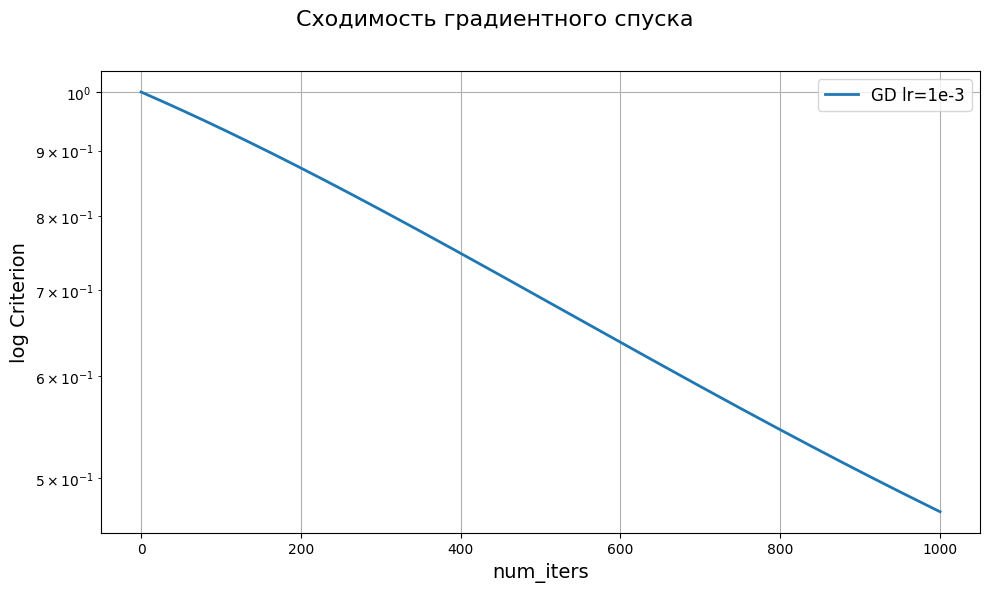

In [ ]:
grad_opt = GradientDescent(lr=1e-3, name='GD lr=1e-3')
gd_res_baseline = test_optimizer(grad_opt)
plot_results([gd_res_baseline], 'Cходимость градиентного спуска')

In [ ]:
1.
constant_lrs = []
s_values = np.array([0.1, 1.0, 2.0, 3.0])
for s in s_values:
  lr = s / lipschitz_mush
  constant_lrs.append(GradientDescent(lr, f's = {s}'))

constant_results = []

for optimizer in constant_lrs:
    constant_results.append(test_optimizer(optimizer, max_iters=1000))

s = 3.0: 100%|██████████| 1000/1000 [00:06<00:00, 160.66it/s, Loss=0.0835, Accuracy=0.996, Grad norm=0.000599]


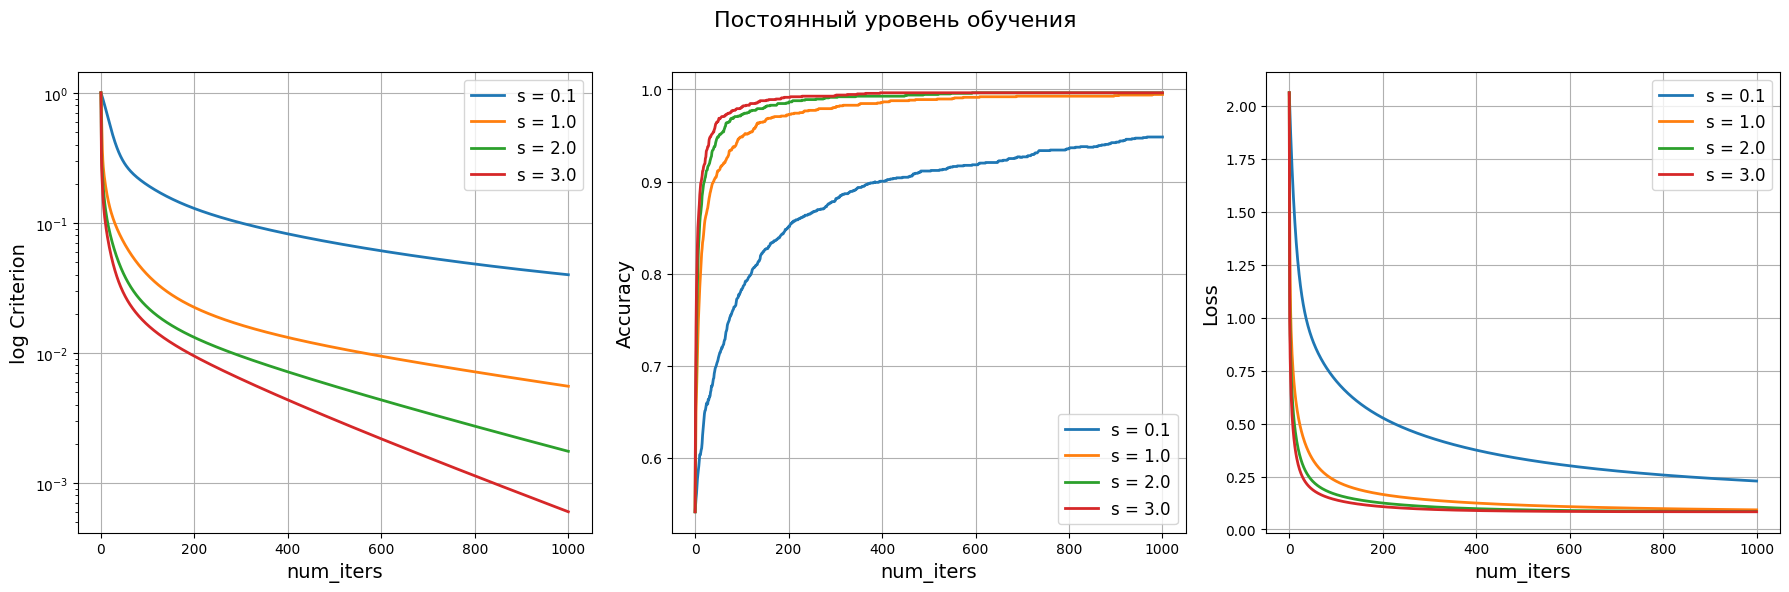

In [ ]:
plot_results(constant_results, "Постоянный уровень обучения",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
2.

def dynamic_lr(initial_gamma, delta):
    # TODO: return a lambda function that depends on k
    return lambda k: initial_gamma / (k + delta)

dynamic_lrs = []
params = [(10, 1), (50, 10), (100, 50), (20, 5)]
for gamma, delta in params:
    lr = dynamic_lr(gamma, delta)
    dynamic_lrs.append(GradientDescent(lr, f"γ={gamma},δ={delta}"))

dynamic_results = []

for optimizer in dynamic_lrs:
    dynamic_results.append(test_optimizer(optimizer, max_iters=1000))

γ=20,δ=5: 100%|██████████| 1000/1000 [00:07<00:00, 133.84it/s, Loss=0.153, Accuracy=0.979, Grad norm=0.0189]


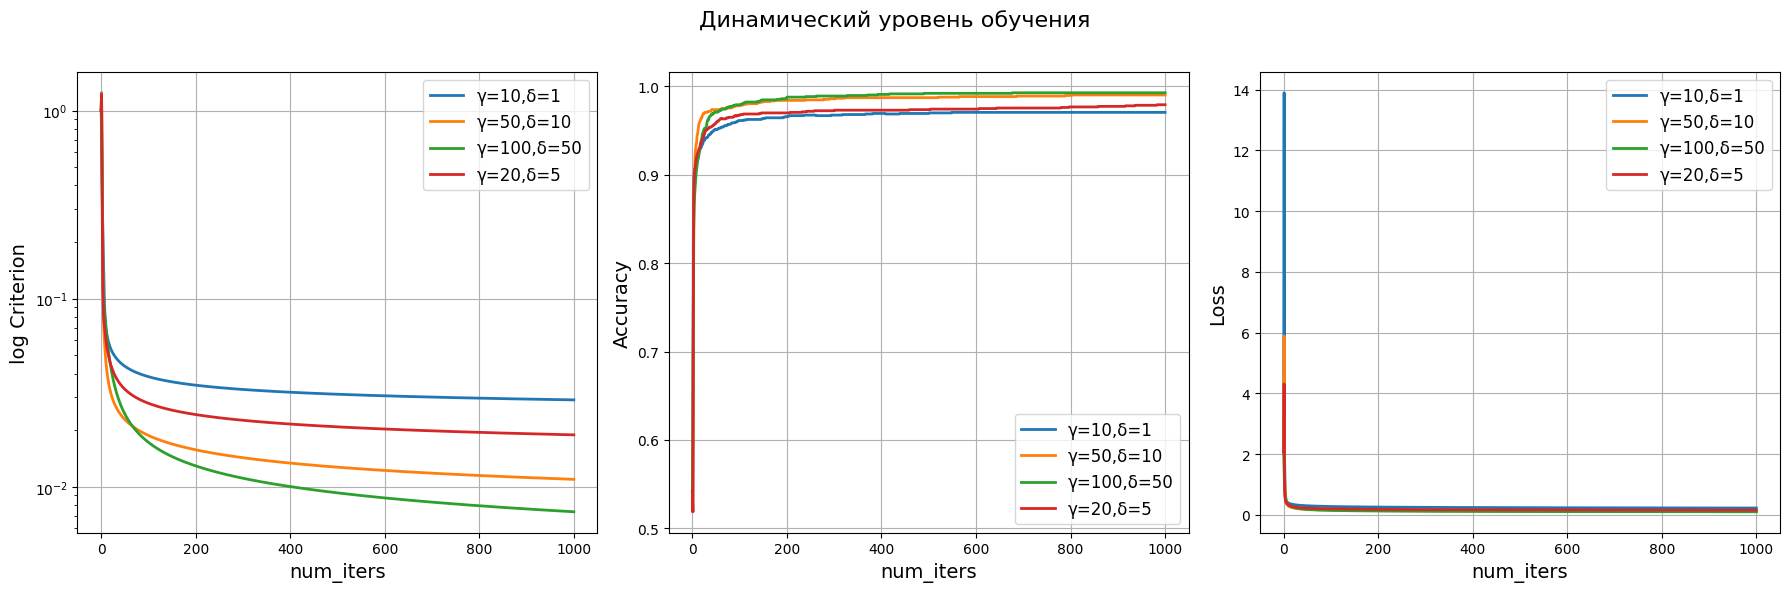

In [ ]:
plot_results(dynamic_results, "Динамический уровень обучения",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
3.
def dynamic_lr_sqrt(initial_gamma, delta):
    return lambda k: initial_gamma / (np.sqrt(k) + delta)

dynamic_lrs_sqrt = []
params = [(10, 1), (50, 10), (100, 50), (20, 5)]
for gamma, delta in params:
    lr = dynamic_lr_sqrt(gamma, delta)
    dynamic_lrs_sqrt.append(GradientDescent(lr, f"sqrt, γ={gamma},δ={delta}"))

dynamic_sqrt_results = []

for optimizer in dynamic_lrs_sqrt:
    dynamic_sqrt_results.append(test_optimizer(optimizer, max_iters=1000))

sqrt, γ=20,δ=5: 100%|██████████| 1000/1000 [00:07<00:00, 134.55it/s, Loss=0.084, Accuracy=0.996, Grad norm=0.00137]


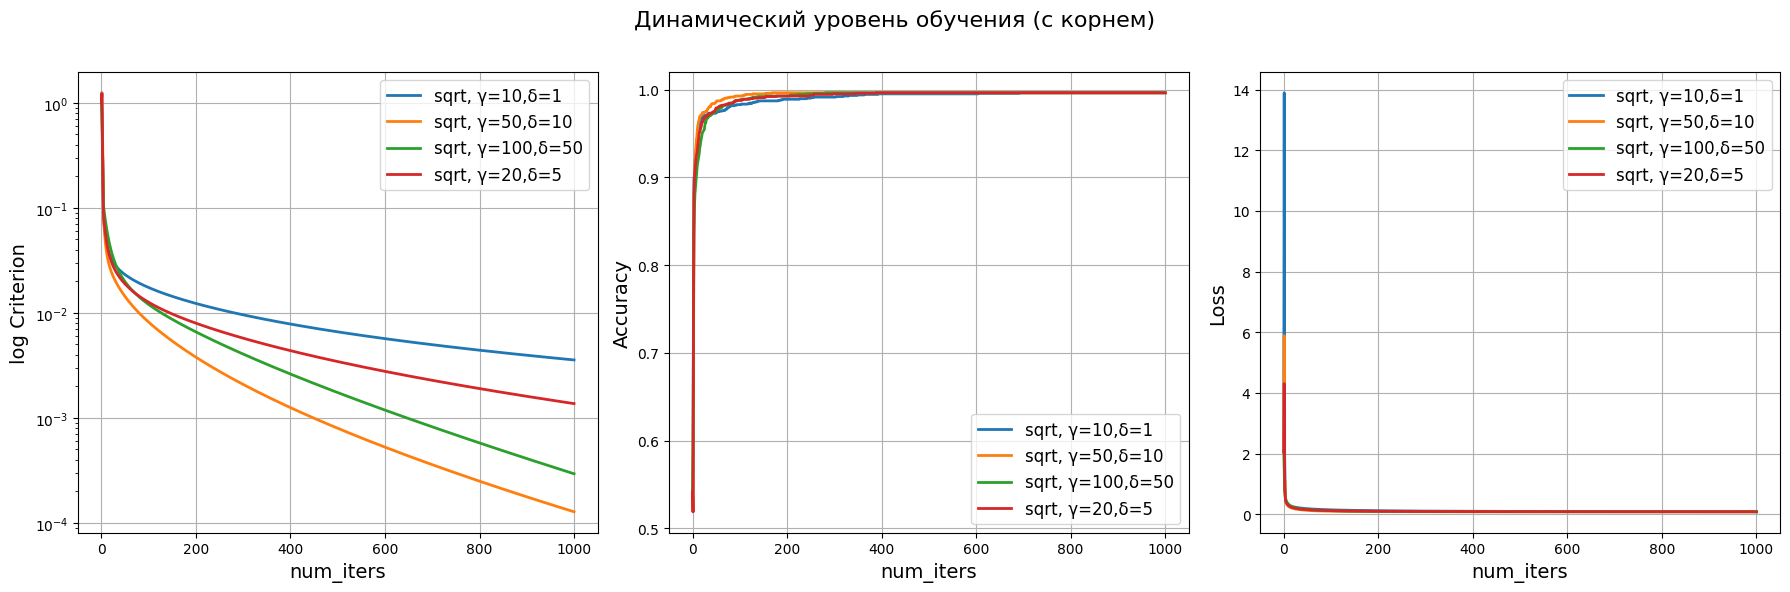

In [ ]:
plot_results(dynamic_sqrt_results, "Динамический уровень обучения (с корнем)",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

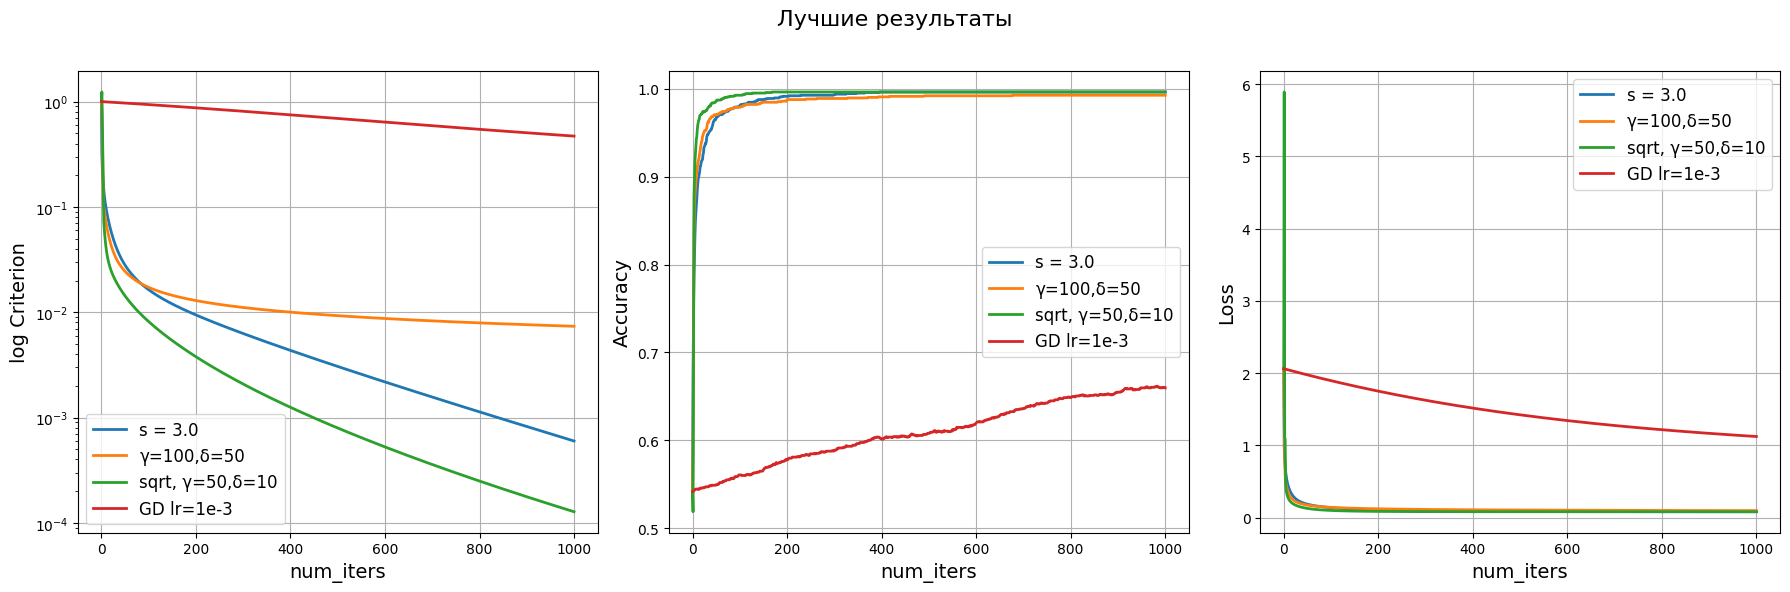

In [ ]:
4.
best_const = min(constant_results, key=lambda x: x["Criterion"][-1])
best_dynamic = min(dynamic_results, key=lambda x: x["Criterion"][-1])
best_dynamic_sqrt = min(dynamic_sqrt_results, key=lambda x: x["Criterion"][-1])

best_results = [best_const, best_dynamic, best_dynamic_sqrt, gd_res_baseline]

plot_results(best_results, "Лучшие результаты",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
best_final_gd_res = best_dynamic_sqrt

Получилось, что наилучшим вариантом шага оказался шаг, обратно пропорциональный корню из k, с параметрами $\gamma = 50, \delta = 10$. При во всех вариациях всех рассмотренных методов accuracy была более 94%, а норма градиента минимум на порядок меньше, чем у базового варианта, что показывает, что динамически изменяющийся шаг либо правильно подобранный константный может значительно услучшить скорость сходимости градиентного спуска.

### Задача 3 (1 балл)

Рассмотрим метод тяжёлого шарика (Heavy Ball)

$$ w^{k+1} = w^k - \gamma_k \nabla \mathcal{L}(w^k) + \tau_k (w^k - w^{k-1}) $$

- Реализуйте шаг метода тяжёлого шарика
- Используйте шаг $\gamma = \frac{1}{L}$.
1. Рассмотрите моментум  $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности: $s \cdot \tau$, где $s \in [0.9, 1.1]$. Рассмотрите не менее 3-х окрестностей.
2. Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации).
3. Сравните полученные результаты.

In [ ]:
class HeavyBall(ManualSolver):
    def __init__(self, lr, beta, init_w, name) -> None:
        super().__init__(lr, name, True, False)
        self.beta = beta if isinstance(beta, Callable) else lambda _: beta
        self.w_prev = init_w

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        gamma = self.lr(k)
        beta = self.beta(k)

        w_new = w - gamma * grad_f + beta * (w - self.w_prev)

        self.w_prev = w.copy()
        return w_new

In [ ]:
1.
gamma = 1 / lipschitz_mush
tau = (np.sqrt(lipschitz_mush) - np.sqrt(lambda_mush)) / (np.sqrt(lipschitz_mush) + np.sqrt(lambda_mush))

s_values = [0.9, 0.95, 1.0, 1.05, 1.1]
hb_results_1 = []

for s in s_values:
  beta = s * tau
  lr = gamma
  hb = HeavyBall(lr, beta, start_w_mush, f"HB_τ = {s:.2f}τ")
  hb_results_1.append(test_optimizer(hb, max_iters=1000))

HB_τ = 1.10τ:  16%|█▋        | 164/1000 [00:01<00:07, 114.74it/s, Loss=264, Accuracy=0.702, Grad norm=0.957]/tmp/ipython-input-3161145506.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
/tmp/ipython-input-3161145506.py:19: RuntimeWarning: invalid value encountered in divide
  probabilities = exp_values / (1 + exp_values)
HB_τ = 1.10τ: 100%|██████████| 1000/1000 [00:06<00:00, 150.93it/s, Loss=nan, Accuracy=0, Grad norm=nan]


In [ ]:
print(1.1 * tau)

1.032562453930226


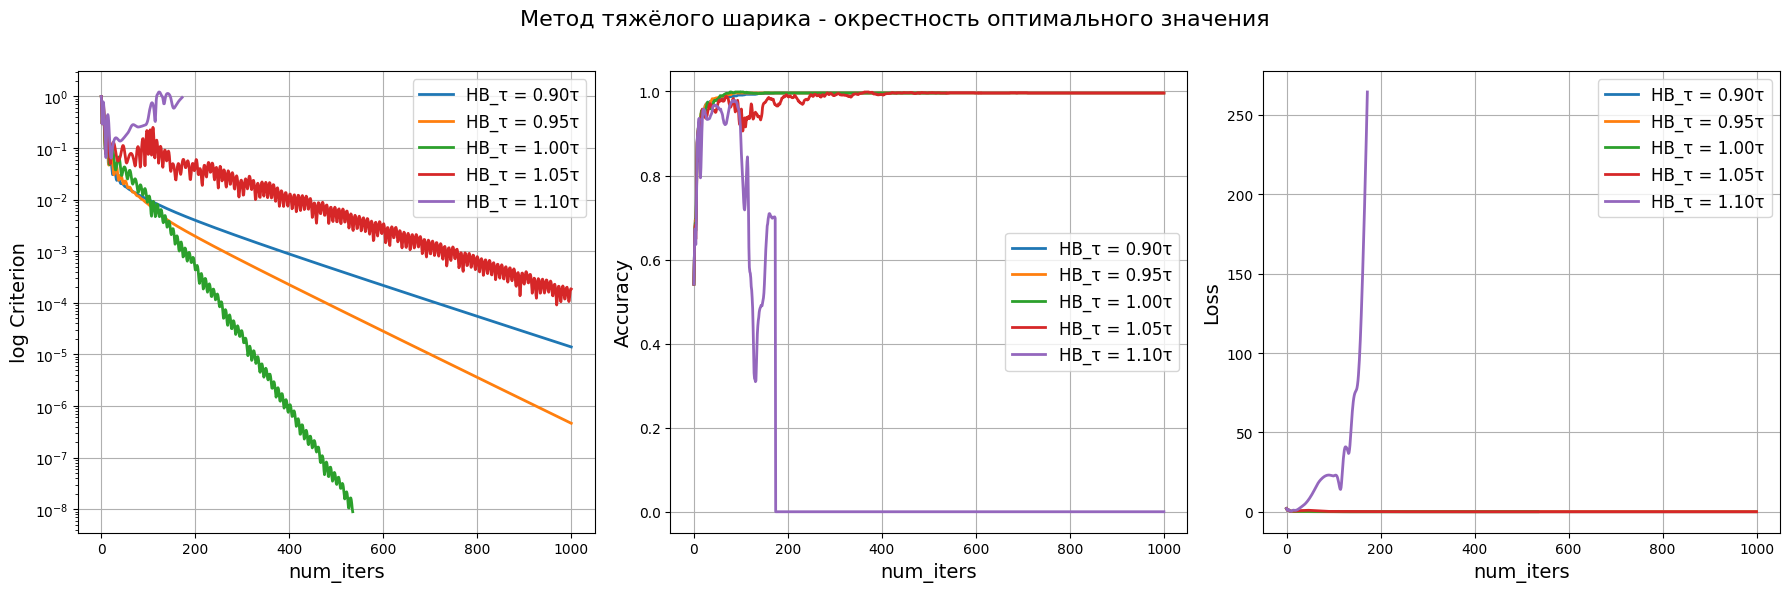

In [ ]:
plot_results(hb_results_1, "Метод тяжёлого шарика - окрестность оптимального значения",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
2.

def beta_k_s(s):
    return lambda x: x / (x + s)

hb_results_2 = []

s_values = [1, 2, 3]
for s in s_values:
  beta = beta_k_s(s)
  lr = gamma
  hb = HeavyBall(lr, beta, start_w_mush, f"HB_τ = k / (k + {s})")
  hb_results_2.append(test_optimizer(hb, max_iters=1000))

HB_τ = k / (k + 3): 100%|██████████| 1000/1000 [00:06<00:00, 152.85it/s, Loss=0.0834, Accuracy=0.996, Grad norm=0.000123]


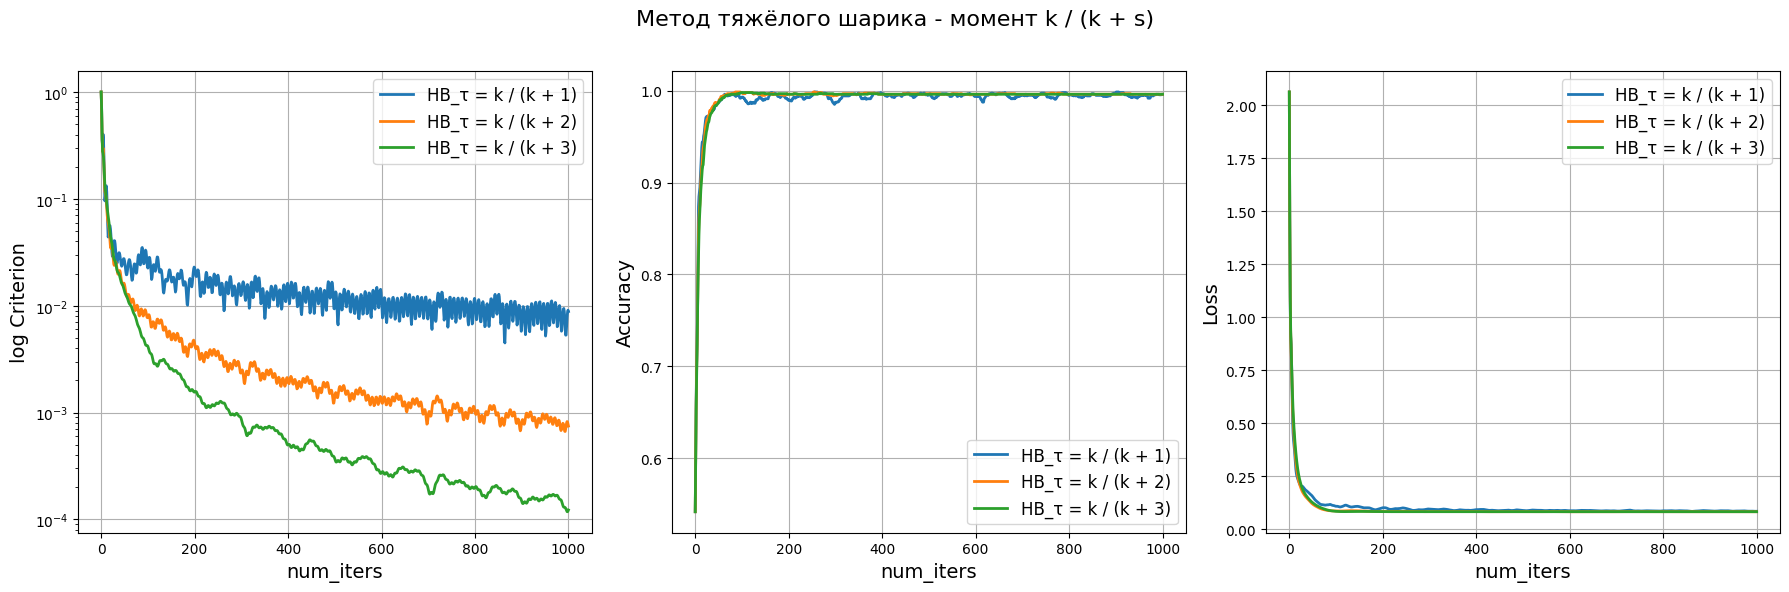

In [ ]:
plot_results(hb_results_2, "Метод тяжёлого шарика - момент k / (k + s)",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

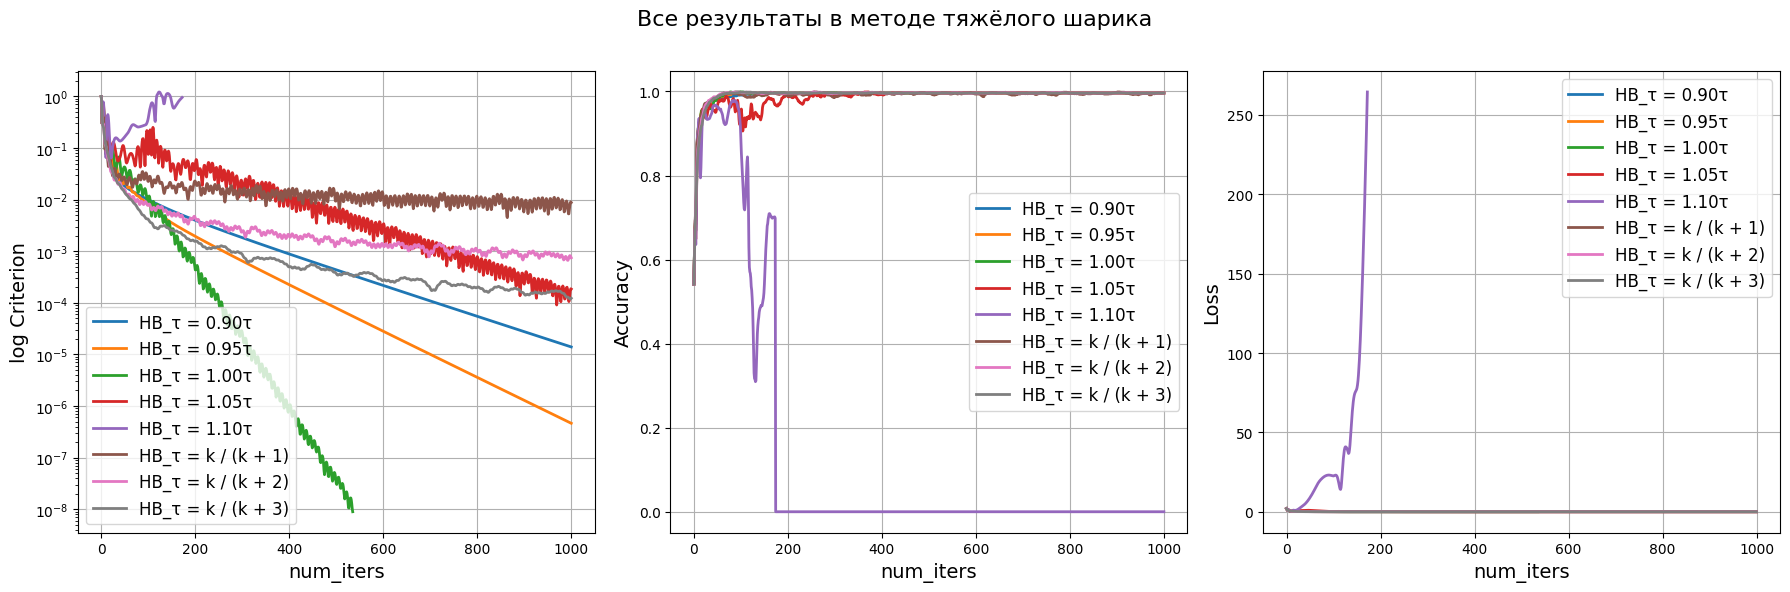

In [ ]:
3.
hb_results = hb_results_1 + hb_results_2
best_result = min(hb_results, key=lambda x: x['Criterion'][-1])

plot_results(hb_results, 'Все результаты в методе тяжёлого шарика',
            metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
best_final_hb_res = best_result

Наилучшую сходимость показал вариант с моментумом, равным оптимальному теоретическому значению, при этом во всех вариантах из первого эксперимента, кроме одного, сходимость оказалась лучше, чем во втором, что показывает важность подбора оптимального значения моментума близкого к теоретическому. При этом в варианте с s = 1.1 произошло переполнение, так как итоговый множитель получился > 1, вследствие чего моменты накапливались.

### Задача 4 (2 балла)

Рассмотрим ускоренный градиентный метод (Nesterov Accelerated Gradient)

$$
\begin{align*}
& w_{k+1} = y_k - \gamma_k \nabla \mathcal{L}(y_k) \\
& y_{k+1} = w_{k+1} + \tau_k (w_{k+1} - w_k)
\end{align*}
$$

- Реализуйте шаг ускоренного градиентного метода
- Используйте шаг $\gamma = \frac{1}{L}$.
1. Рассмотрите моментум  $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности: $s \cdot \tau$, где $s \in [0.9, 1.1]$. Рассмотрите не менее 3-х окрестностей.
2. Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации).
3. Сравните полученные результаты.

In [ ]:
class NAG(ManualSolver):
    def __init__(self, lr, beta, init_w, name) -> None:
        super().__init__(lr, name, False, False)
        self.beta = beta if isinstance(beta, Callable) else lambda _: beta
        self.w_prev = init_w
        self.y_prev = init_w

    def step(self, w: np.ndarray, k: int, grad_f: None, hess_f: None) -> np.ndarray:
        gamma = self.lr(k)
        beta = self.beta(k)

        y_grad = mush_grad(self.y_prev)

        w_new = self.y_prev - gamma * y_grad
        y_new = w_new + beta * (w_new - w)

        self.w_prev = w.copy()
        self.y_prev = y_new
        return w_new

In [ ]:
1.
gamma = 1 / lipschitz_mush
tau = (np.sqrt(lipschitz_mush) - np.sqrt(lambda_mush)) / (np.sqrt(lipschitz_mush) + np.sqrt(lambda_mush))

s_values = [0.9, 0.95, 1.0, 1.05]
nag_results_1 = []

for s in s_values:
  beta = s * tau
  lr = gamma
  nag = NAG(lr, beta, start_w_mush, f"NAG_τ = {s:.2f}τ")
  nag_results_1.append(test_optimizer(nag, max_iters=1000))

NAG_τ = 1.05τ: 100%|██████████| 1000/1000 [00:10<00:00, 97.64it/s, Loss=0.0834, Accuracy=0.996, Grad norm=9.6e-6]


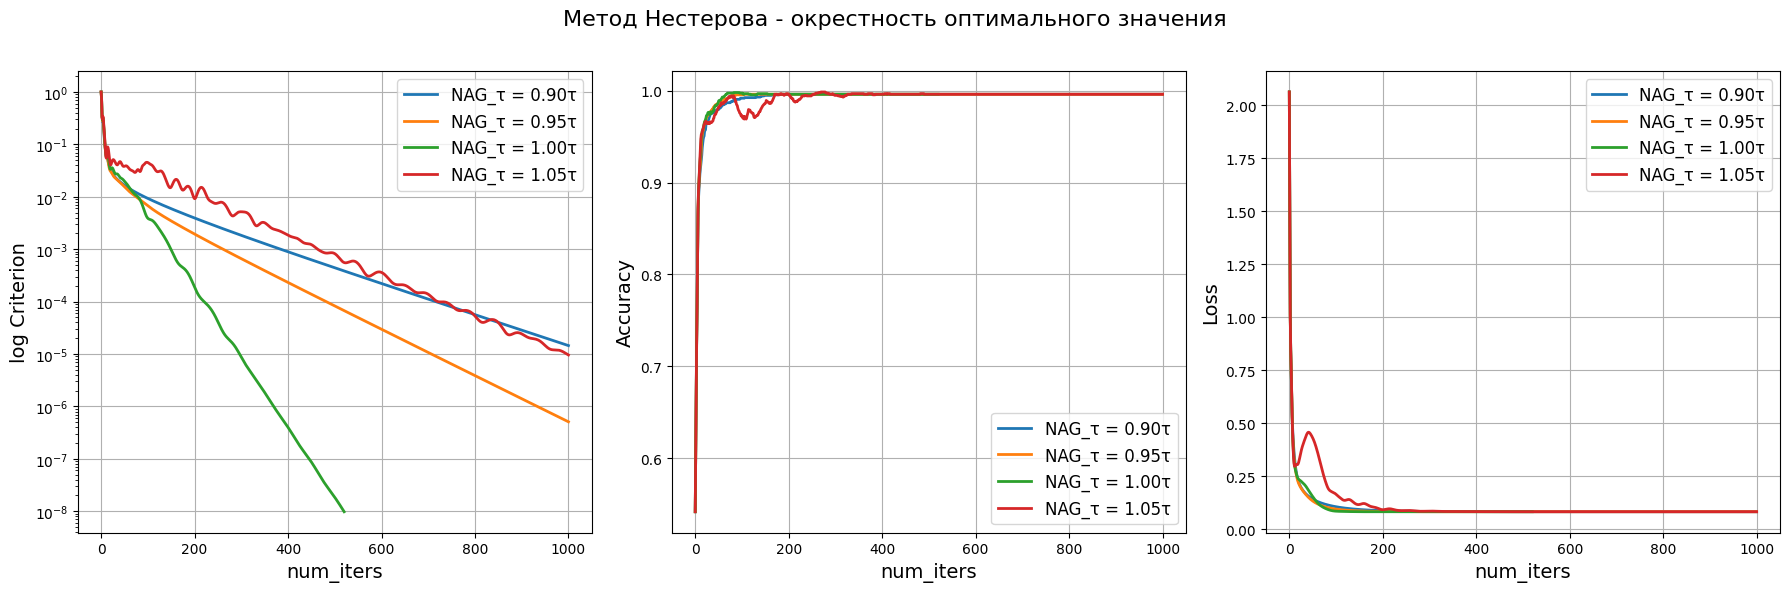

In [ ]:
plot_results(nag_results_1, "Метод Нестерова - окрестность оптимального значения",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
2.

def beta_k_s(s):
    return lambda x: x / (x + s)

nag_results_2 = []

s_values = [1, 2, 3]
for s in s_values:
  beta = beta_k_s(s)
  lr = gamma
  nag = NAG(lr, beta, start_w_mush, f"NAG_τ = k / (k + {s})")
  nag_results_2.append(test_optimizer(nag, max_iters=1000))

NAG_τ = k / (k + 3): 100%|██████████| 1000/1000 [00:09<00:00, 106.72it/s, Loss=0.0834, Accuracy=0.996, Grad norm=4.64e-5]


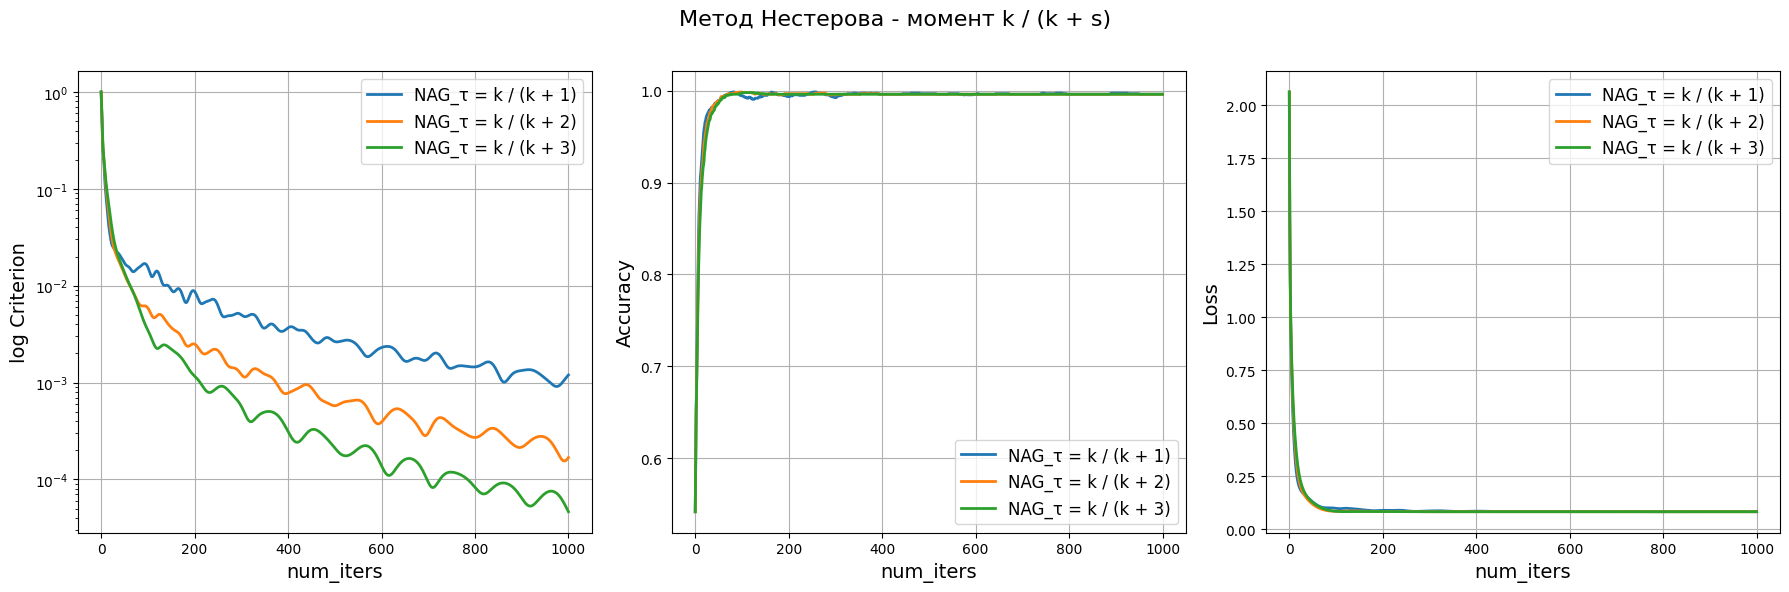

In [ ]:
plot_results(nag_results_2, "Метод Нестерова - момент k / (k + s)",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

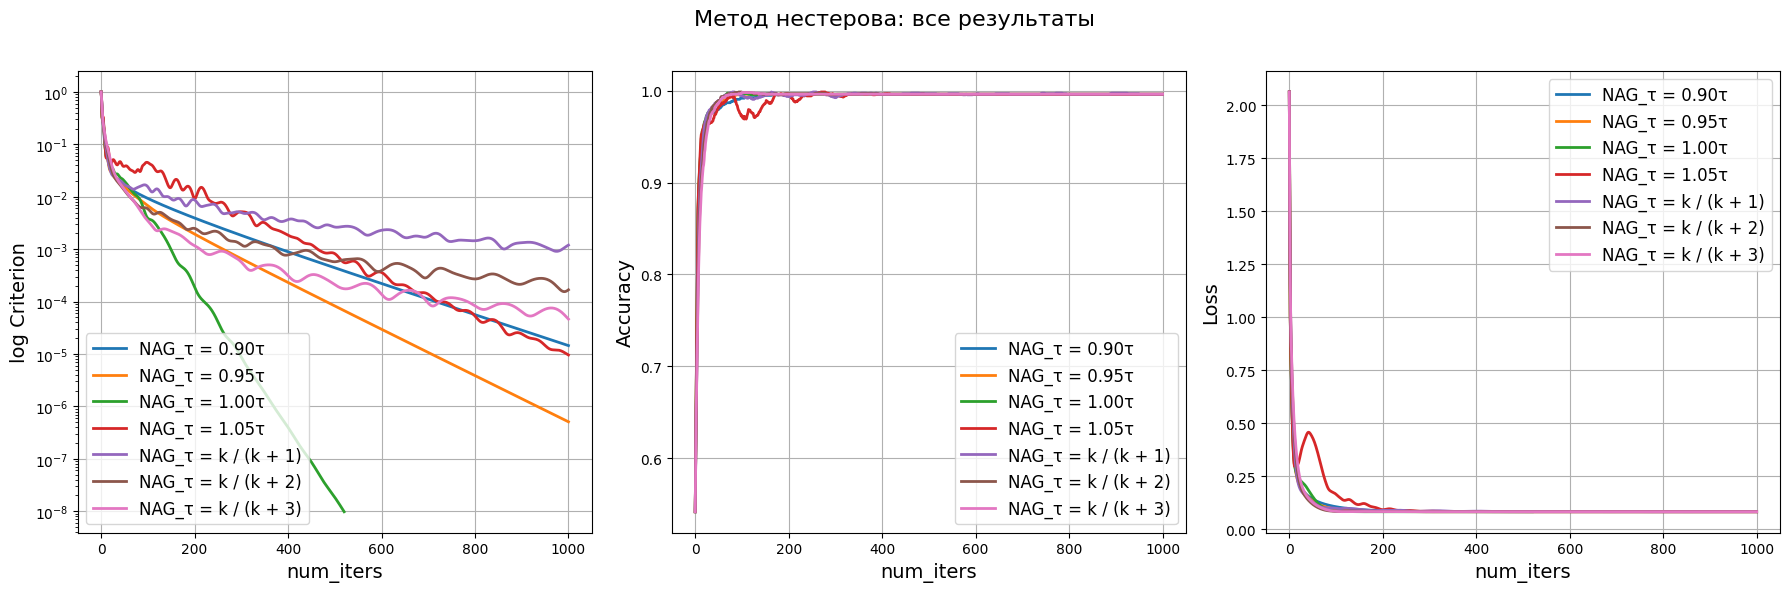

In [ ]:
3.
nag_results = nag_results_1 + nag_results_2

best_result = min(nag_results, key=lambda x: x["Criterion"][-1])

plot_results(nag_results, 'Метод нестерова: все результаты',
            metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
best_final_nag_res = best_result

Ситуация со сходимостью полностью аналогична предыдущему методу.

### Задача 5 (1 балла)

Рассмотрим один из самых известных методов второго порядка - Метод Ньютона (Newton's method):

$$
w_{k+1} = w_k - \nabla^2\mathcal{L}(w^k)^{-1} \nabla \mathcal{L}(w^k)
$$

А точнее, его модификацию - демпфированный метод Ньютона (Dumped Newton's method):

$$
w_{k+1} = w_k - \gamma_k \nabla^2\mathcal{L}(w^k)^{-1} \nabla \mathcal{L}(w^k)
$$

- Реализуйте шаг демпфированного метода Ньютона
1.  Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $s \in [0.5, 1.5]$, $L$ - константа липшица в задаче. Рассмотрите не менее 3-х $s$.
2. Сравните полученные результаты.

In [ ]:
class Newton(ManualSolver):
    def __init__(self, lr, name) -> None:
        super().__init__(lr, name, True, True)

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: np.ndarray) -> np.ndarray:
        gamma = self.lr(k)

        w_new = w - gamma * np.linalg.solve(hess_f, grad_f)
        return w_new

In [ ]:
1.
s_values = [0.5, 0.8, 1.0, 1.2, 1.5]
newton_results = []

for s in s_values:
    lr = s / lipschitz_mush
    newton = Newton(lr, f"Newton_s={s}")
    newton_results.append(test_optimizer(newton, max_iters=100))

Newton_s=1.2:   9%|▉         | 9/100 [00:00<00:02, 43.64it/s, Loss=114, Accuracy=0.481, Grad norm=1.46]/tmp/ipython-input-3161145506.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
/tmp/ipython-input-3161145506.py:19: RuntimeWarning: invalid value encountered in divide
  probabilities = exp_values / (1 + exp_values)
Newton_s=1.2:   9%|▉         | 9/100 [00:00<00:02, 43.64it/s, Loss=inf, Accuracy=0.519, Grad norm=nan] /tmp/ipython-input-3161145506.py:29: RuntimeWarning: invalid value encountered in divide
  sigmoid = exp_values / (1 + exp_values)
Newton_s=1.5: 100%|██████████| 100/100 [00:01<00:00, 60.77it/s, Loss=nan, Accuracy=0, Grad norm=nan]


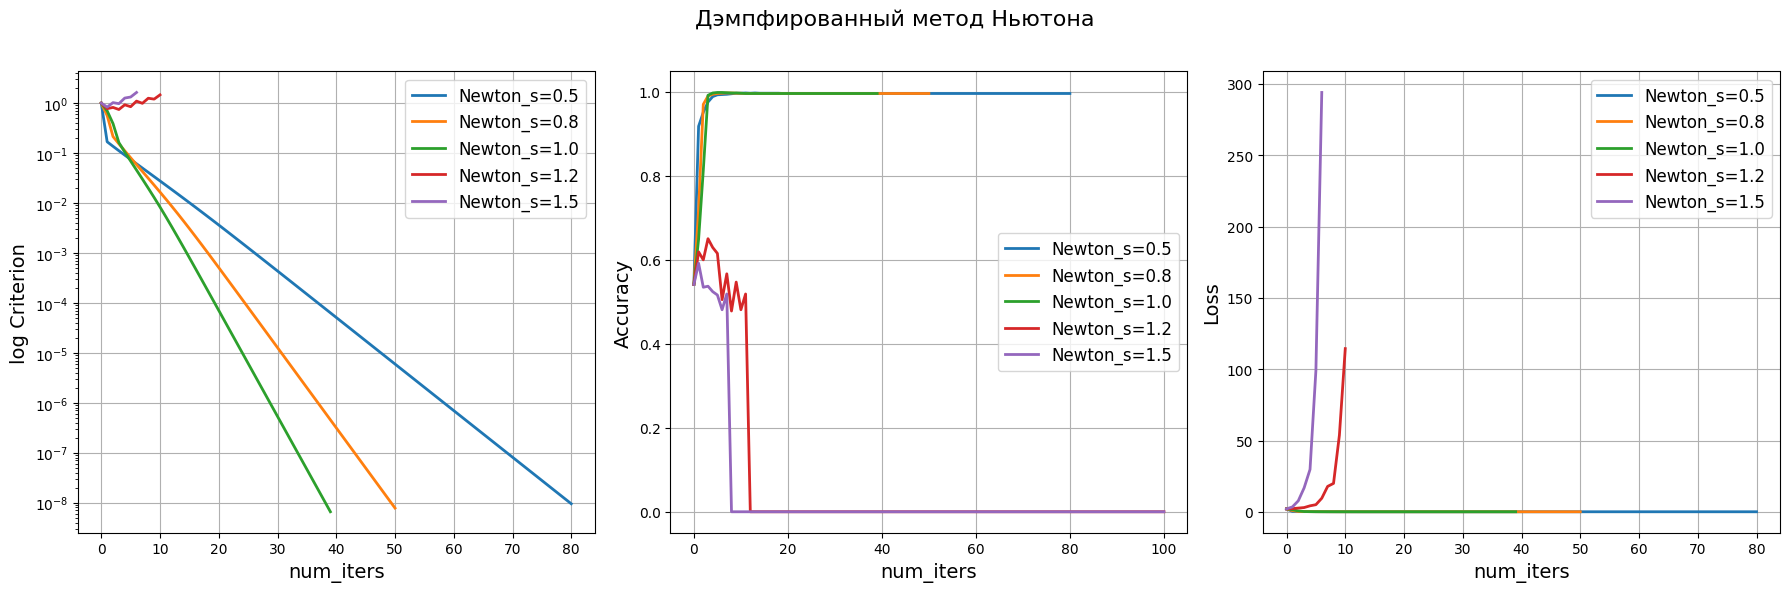

In [ ]:
plot_results(newton_results, "Дэмпфированный метод Ньютона",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [ ]:
2.
best_result = min(newton_results, key=lambda x: x["Criterion"][-1])

In [ ]:
best_final_newton_res = best_result

При s > 1 получаем слишком большой шаг, вследствие этого метод не сходится, так как происходит "перепрыгивание" минимума.

### Сравнение лучших реализаций

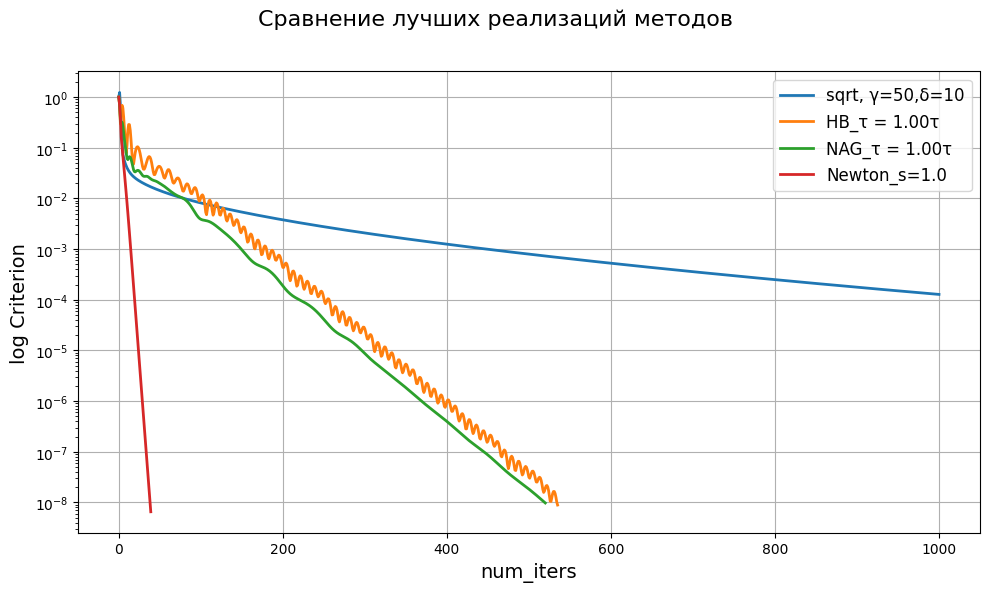

In [ ]:
final_results = [best_final_gd_res, best_final_hb_res, best_final_nag_res, best_final_newton_res]
plot_results(final_results, 'Сравнение лучших реализаций методов', metrics_type=['Criterion'])

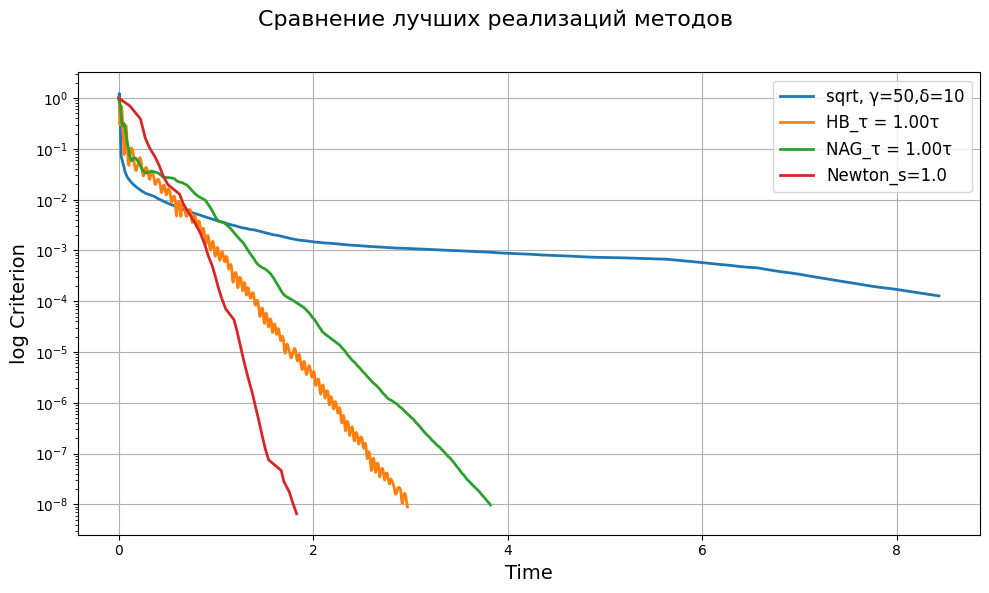

In [ ]:
final_results = [best_final_gd_res, best_final_hb_res, best_final_nag_res, best_final_newton_res]
plot_results(final_results, 'Сравнение лучших реализаций методов', metrics_type=['Criterion'], x='Time')

### Ваши выводы (до 0.5 баллов):

1. Почему предложено выбирать $\gamma = \frac{s}{L}$, $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$?
2. Почему наблюдаются различия в графиках по количеству итераций и по времени?
3. Любые другие рассуждения приветствуются.

1.

Для $L-$гладкой функции выполняется условие Липшица для графиента: $\|\nabla f(x) - \nabla f(y)\| \leq L \|x - y\|$. Таким образом $\gamma = \frac{1}{L}$ - это максимальное число, при котором будет гарантирована сходимость.

Перепишем $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ в виде $\frac{\sqrt{\frac{L}{\mu}} - 1}{\sqrt{\frac{L}{\mu}} + 1}$ - оптимальная оценка, полученная из решения уравнений для динамической системы, описывающей тяжёлый шарик.

2.

Различия по итерациям отражают теоретическую эффективность методов, например для сходимости метода Нестерова требуется меньше итераций, чем для градиентного спуска.

Различия показывают практическую эффективность методов, так как учитывает не только число итераций, но и сложность их вычисления. Например по графику видно, что по времени метод Ньютона сходится примерно в два раза быстрее, чем метод Нестерова, но итераций совершается более чем в 10 раз меньше - это показывает, что итерации в методе ньютона более тяжеловесные

3.

Итерации в методе градиентного спуска самые легковесные, но при этом их требуется больше. Их лучше использовать при больших размерах выборки.

Метод Ньютона затратен по вычислениям и более эффективен при малой размерности пространства признаков, так как получается проще считать гессиан.

Остальные методы можно считать компромиссным вариантом, так как они обеспечивают более быструю сходимость, чем градиентные, но при этом опреации проще, чем квадратичных методах.

### Задача 6* (1 балл)

Метод проксимального градиентного спуска используется для оптимизации композитной функции потерь
$$
h(w) = f(w) + g(w),
$$
где $f(w)$ является выпуклой дифференцируемой функцией на своей области определения. Особенностью является то, что $g(w)$ не обязательно должна быть дифференцируема всюду на своём множестве определения.  

Мы решаем задачу вида
$$
\min_{w\in \mathbb{R}^d}\{f(w) + R(w)\},
$$
где $R(w)$ - выпуклый (возможно негладкий) регуляризатор.

Обновление параметров осуществляется по схеме
$$
w_{k+1} = prox_{\gamma R}(w_k - \gamma\nabla f(w)),
$$
где проксимальный оператор определяется как
$$
prox_{\gamma R}(v) = \arg\min_{w\in \mathbb{R}^d}\left\{\dfrac{1}{2\gamma}\|w - v\|^2 + R(w) \right\}.
$$

* Реализуйте шаг проксимального градиентного спуска для различных видов $R(w)$ (L1, L2-регуляризация).
1. Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $L$ определяется согласно $R(w)$.
2. Сравните полученные результаты.

Используем регуляризацию в виде:
$$
L_2: \frac{\lambda}{2} \|w\|_2^2; \quad L_1: \lambda \|w\|_1
$$

In [17]:
def prox_l1(v: np.ndarray, gamma: float, lambda_reg: float = lambda_mush) -> np.ndarray:
    return np.sign(v) * np.maximum(np.abs(v) - gamma * lambda_reg, 0)

def prox_l2(v: np.ndarray, gamma: float, lambda_reg: float = lambda_mush) -> np.ndarray:
    return v / (1 + gamma * lambda_reg)

def mush_f_l1(w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y) -> float:
    return np.mean(np.log(1 + mush_exp(x, y, w))) + lambda_mush * np.linalg.norm(w, 1)

def mush_f_l2(w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y) -> float:
    return mush_f(w, x, y)

def mush_grad_smooth(w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y) -> np.ndarray:
    N = x.shape[0]
    exp_values = mush_exp(x, y, w)
    probabilities = exp_values / (1 + exp_values)
    return (-1 / N) * (x.T @ (y * probabilities))

In [19]:
class ProximalGradient(ManualSolver):
    def __init__(self, lr, prox_operator, loss_func, grad_func, name) -> None:
        super().__init__(lr, name, True, False)
        self.prox_operator = prox_operator
        self.loss_func = loss_func
        self.grad_func = grad_func

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        gamma = self.lr(k)

        v = w - gamma * self.grad_func(w)

        w_new = self.prox_operator(v, gamma)

        return w_new

def eval_optimizer_step_prox(
    w: np.ndarray,
    loss_func: Callable,
    grad_func: Callable,
    x: np.ndarray = test_mush_x,
    y: np.ndarray = test_mush_y
) -> list[float, float, float]:

    train_grad = grad_func(w, train_mush_x, train_mush_y)
    grad_norm = np.linalg.norm(train_grad)

    accuracy = mush_accuracy(w, x, y)

    val_loss = loss_func(w, x, y)

    return [grad_norm, accuracy, val_loss]

def test_optimizer_prox(
    optimizer: ProximalGradient,
    max_iters: int = 1000,
    start_w: np.ndarray = start_w_mush,
    stop_criterion: float = 1e-8,
) -> dict:
    accuracies = []
    losses = []
    criterion_logs = []
    time_logs = []

    w = start_w.copy()

    # initial eval
    start_grad_norm, accuracy, val_loss = eval_optimizer_step_prox(
        w, optimizer.loss_func, optimizer.grad_func
    )
    time_logs.append(0)
    criterion_logs.append(start_grad_norm / start_grad_norm)
    accuracies.append(accuracy)
    losses.append(val_loss)

    start_time = time.time()

    with tqdm(range(max_iters), desc=optimizer.name) as loop:
        for k in loop:
            # train
            grad_smooth = optimizer.grad_func(w)
            w = optimizer.step(w, k, grad_smooth, None)

            # eval
            grad_norm, accuracy, val_loss = eval_optimizer_step_prox(
                w, optimizer.loss_func, optimizer.grad_func
            )
            criterion_logs.append(grad_norm / start_grad_norm)
            accuracies.append(accuracy)
            losses.append(val_loss)
            time_logs.append(time.time() - start_time)

            loop.set_postfix({
                "Loss": val_loss,
                "Accuracy": accuracy,
                "Grad norm": grad_norm / start_grad_norm
            })

            if grad_norm / start_grad_norm <= stop_criterion:
                break

    results_dict = {
        "name": optimizer.name,
        "num_iters": list(range(len(accuracies))),
        "Time": time_logs,
        "Accuracy": accuracies,
        "Criterion": criterion_logs,
        "Loss": losses,
        "W": w.copy(),
    }

    return results_dict

In [20]:
1.
s_values = [0.1, 0.5, 0.8, 1.0, 1.2]
l1_results = []

L_smooth = lipschitz_mush

for s in s_values:
    lr = s / lipschitz_mush
    prox = lambda v, gamma: prox_l1(v, gamma, lambda_mush)

    pgd = ProximalGradient(
        lr, prox, mush_f_l1, mush_grad_smooth, f"PGD_L1_s={s}"
    )
    l1_results.append(test_optimizer_prox(pgd, max_iters=1000))

PGD_L1_s=1.2: 100%|██████████| 1000/1000 [00:08<00:00, 112.24it/s, Loss=0.122, Accuracy=0.998, Grad norm=0.0122]


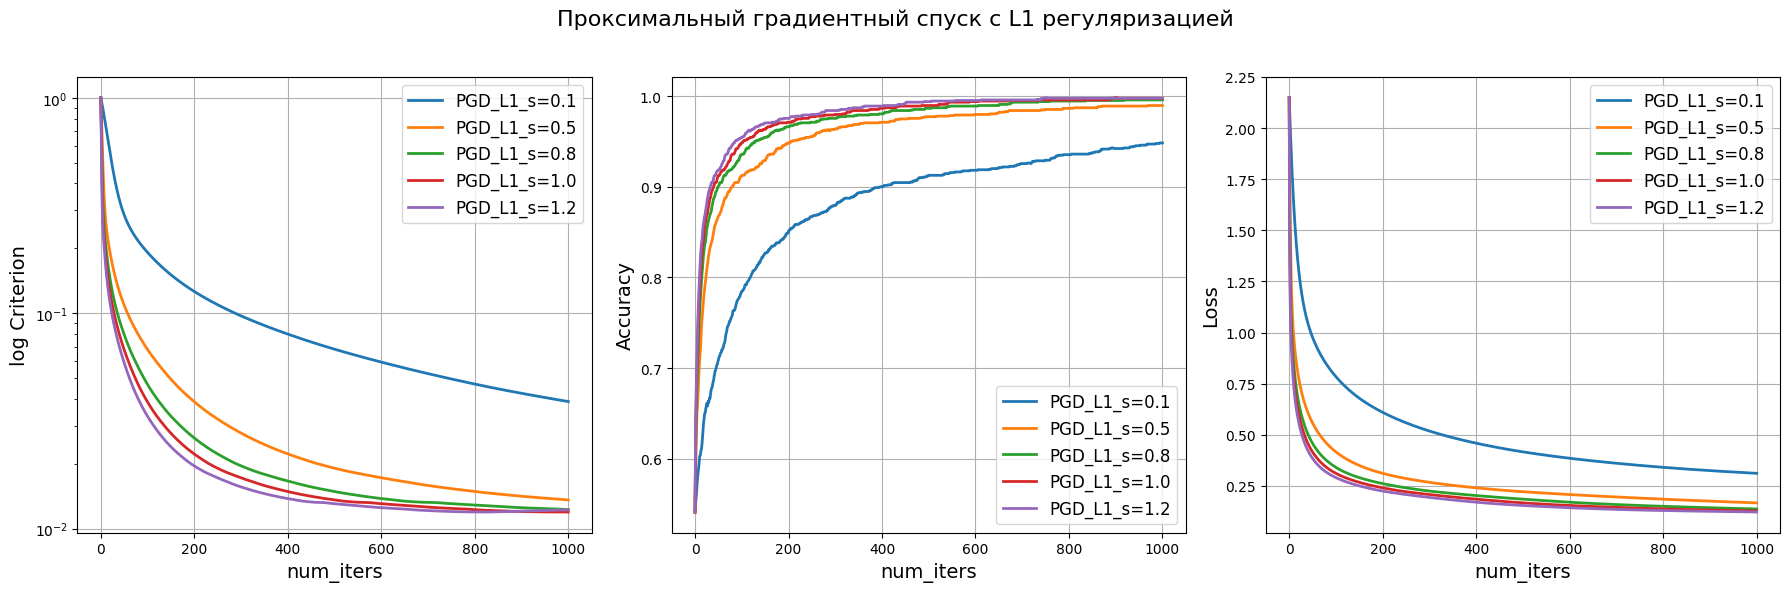

In [24]:
plot_results(l1_results, "Проксимальный градиентный спуск с L1 регуляризацией",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

In [25]:
2.
l2_results = []

for s in s_values:
    lr = s / L_smooth
    prox = lambda v, gamma: prox_l2(v, gamma, lambda_mush)

    pgd = ProximalGradient(
        lr, prox, mush_f_l2, mush_grad_smooth, f"PGD_L2_s={s}"
    )
    l2_results.append(test_optimizer_prox(pgd, max_iters=1000))


PGD_L2_s=1.2: 100%|██████████| 1000/1000 [00:09<00:00, 108.46it/s, Loss=0.0893, Accuracy=0.996, Grad norm=0.0109]


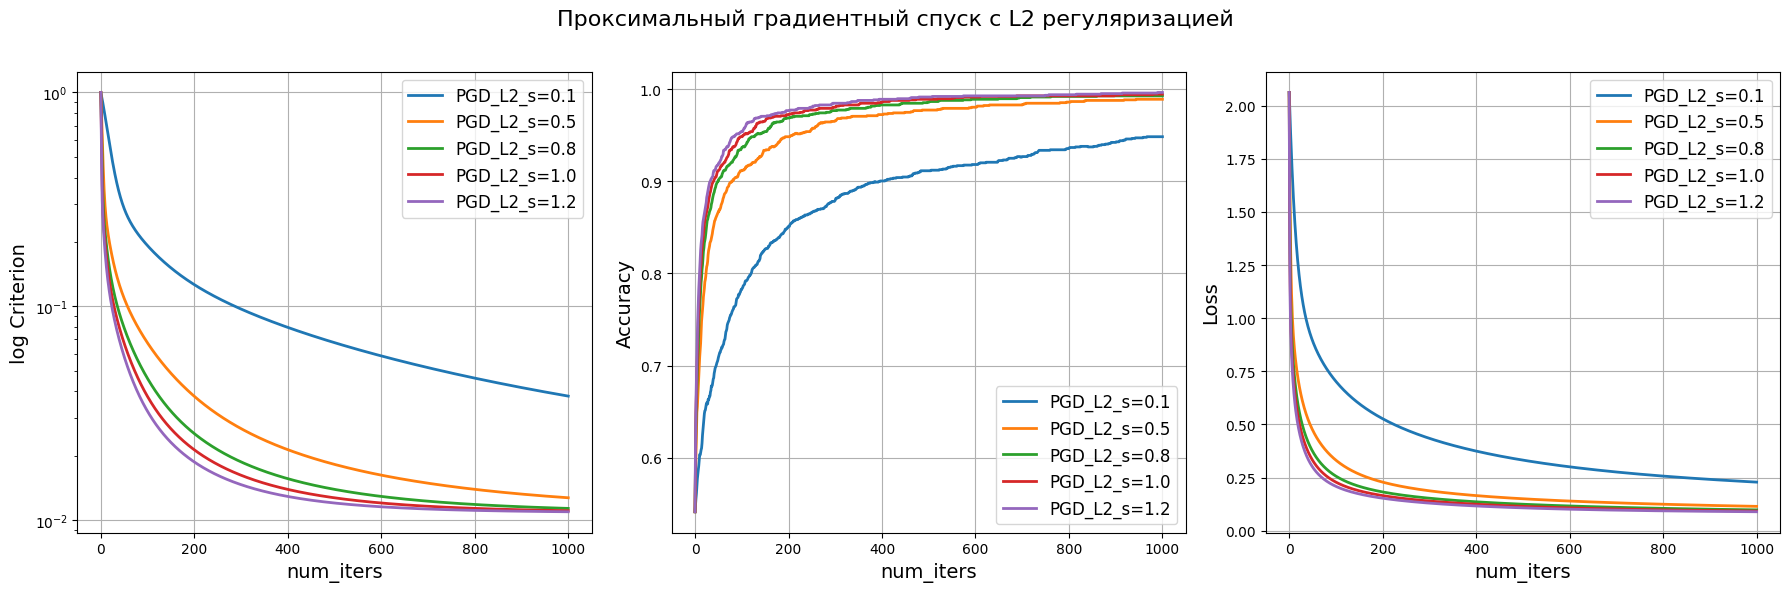

In [26]:
plot_results(l2_results, "Проксимальный градиентный спуск с L2 регуляризацией",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

L1: 74/112 нулевых весов (66.1%)
L2: 0/112 нулевых весов (0.0%)


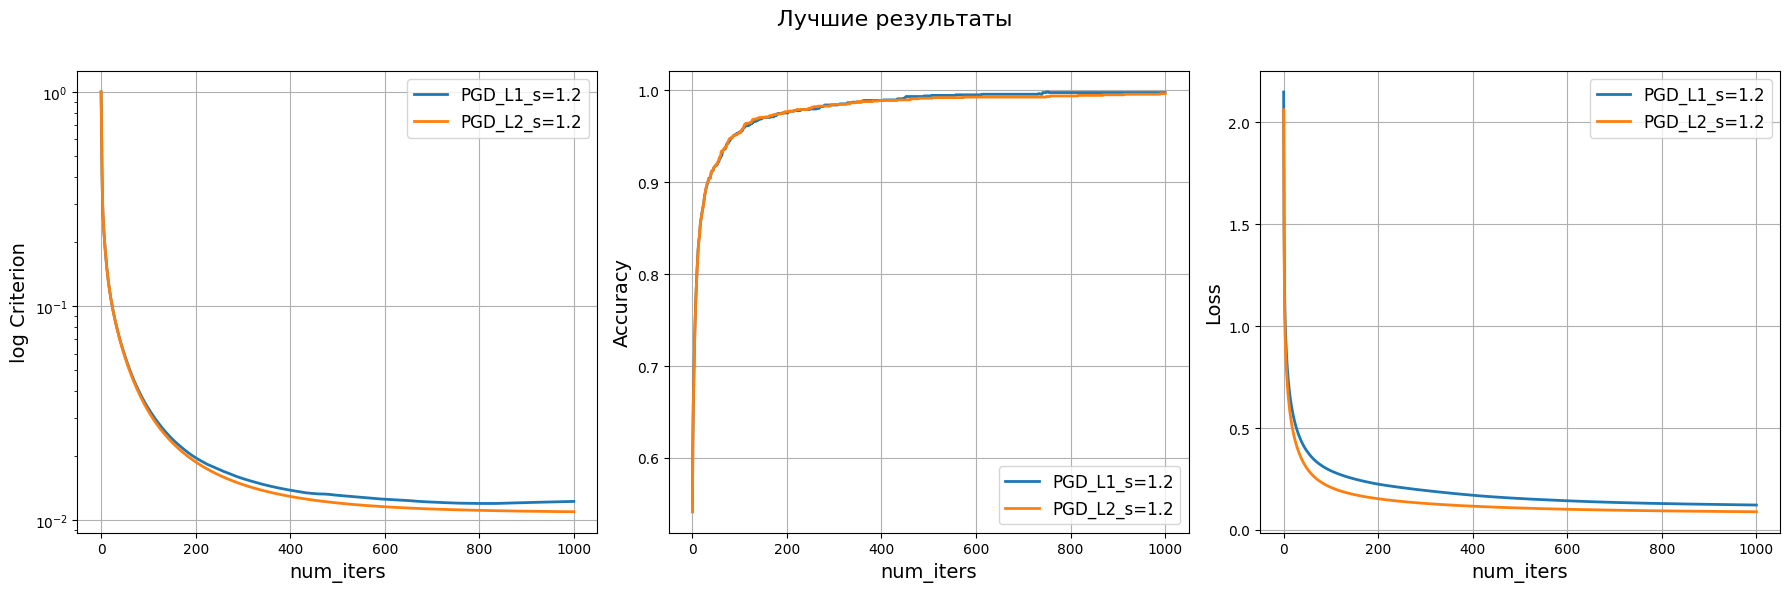

In [27]:
def analyze_sparsity(w: np.ndarray, threshold: float = 1e-6) -> dict:
    """Анализ разреженности вектора весов"""
    zero_count = np.sum(np.abs(w) < threshold)
    total_count = len(w)
    sparsity_ratio = zero_count / total_count

    return {
        'zero_weights': zero_count,
        'total_weights': total_count,
        'sparsity_ratio': sparsity_ratio,
        'non_zero_indices': np.where(np.abs(w) > threshold)[0]
    }

best_l1 = min(l1_results, key=lambda x: x["Loss"][-1])
w_l1 = best_l1["W"]
sparsity_l1 = analyze_sparsity(w_l1)
print(f"L1: {sparsity_l1['zero_weights']}/{sparsity_l1['total_weights']} нулевых весов "
      f"({sparsity_l1['sparsity_ratio']:.1%})")

best_l2 = min(l2_results, key=lambda x: x["Loss"][-1])
w_l2 = best_l2["W"]
sparsity_l2 = analyze_sparsity(w_l2)
print(f"L2: {sparsity_l2['zero_weights']}/{sparsity_l2['total_weights']} нулевых весов "
      f"({sparsity_l2['sparsity_ratio']:.1%})")

plot_results([best_l1 , best_l2], "Лучшие результаты",
             metrics_type=['Criterion', 'Accuracy', 'Loss'])

Разница в  регуляризации, как и предполагалось, не повлияла на сходимость. При этом в случае LASSO регрессии наблюдается сильная разреженность весо, что подтверждает теоретические предположения

## Задание 3: Предсказание погоды в Австралии

Датасет содержит ежедневные наблюдения погоды в различных регионах Австралии за период в 10 лет.

Предсказываемым признаком является `RainTomorrow`: "Будет ли завтра дождь?". Это задача бинарной классификации.

Скачиваем датасет

In [1]:
import pandas as pd
import seaborn as sns

In [5]:
url = 'https://huggingface.co/Anm5/rainpred/resolve/main/weatherAUS.csv'
filename = 'weatherAUS.csv'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)
df = pd.read_csv(filename)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Задача 1 (3 балла): Анализ датасета

Датасет представляет собой табличные данные. В этом задании вы убедитесь, что основной объём работы в классификации таких данных с помощью методов машинного обучения состоит в анализе датасета и его признаков.

Давайте выведем общую информацию о признаках в датасете

In [8]:
df.info()
print(f"Number of NaN targets: {df['RainTomorrow'].isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Можно заметить, что для некоторых примеров в датасете отсутствует разметка. Поскольку мы решаем задачу классификации с учителем, эти примеры нас не интересуют.

**Удалите из датасета сэмплы с отсутствующим значением `RainTomorrow`**.

In [9]:
df = df.dropna(subset=['RainTomorrow'])

Выделим категориальные переменные

In [10]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('The categorical variables are :', categorical)
for feature in categorical:
    print(f"Number of unique {feature}:", df[feature].nunique())

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Number of unique Date: 3436
Number of unique Location: 49
Number of unique WindGustDir: 16
Number of unique WindDir9am: 16
Number of unique WindDir3pm: 16
Number of unique RainToday: 2
Number of unique RainTomorrow: 2


`RainTomorrow` является целевым признаком. `RainToday` нетрудно бинаризовать. Остальные признаки содержат большое количество значений.

В первом приближении, удалим признаки кроме `RainTomorrow`, `RainToday`.

**Важно:** датасет без категориальных признаков необходимо записать в отдельную переменную `df_numerical`. Исходный набор `df` пригодится в дополнительном задании.

**Бинаризуйте признаки `RainTomorrow`, `RainToday`. Остальные удалите**

In [11]:
from sklearn.preprocessing import LabelEncoder

df_numerical = df.copy()

label_encoder = LabelEncoder()

df_numerical['RainToday'] = label_encoder.fit_transform(df_numerical['RainToday'])
df_numerical['RainTomorrow'] = label_encoder.fit_transform(df_numerical['RainTomorrow'])

df_numerical = df_numerical.drop(columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Перейдём к численным признакам

In [12]:
numerical = [var for var in df.columns if df[var].dtype!='O']
round(df_numerical[numerical].describe(), 2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.00,141871.00,140787.00,81350.00,74377.00,132923.00,140845.00,139563.00,140419.00,138583.00,128179.00,128212.00,88536.00,85099.00,141289.00,139467.00
mean,12.19,23.23,2.35,5.47,7.62,39.98,14.00,18.64,68.84,51.48,1017.65,1015.26,4.44,4.50,16.99,21.69
std,6.40,7.12,8.47,4.19,3.78,13.59,8.89,8.80,19.05,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.90,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.50,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.80,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


Одним из важных аспектов обработки численных признаков является *опеределение выбросов (англ. outliers)*. С одной стороны, выбросы можно выделить для всех признаков. Однако, бывает полезно изучить, для каких фичей они более характерны. Это позволит избежать потери важной информации.

**Вам необходимо определить, для каких из численных признаков имеет смысл выделять выбросы.**

**Примечание:** Это можно сделать с помощью графика гистограммы. Отрисуйте зависимости всех числовых признаков от целевого `RainTomorrow`. По оси x отложите значения признака, по оси y - плотность `RainTomorrow` (в результате на рисунке будут 2 графика для каждого из бинарных значений). Для этого воспользуйтесь функцией `seaborn.histplot` с аргументом `stat='density'`. По виду графика можно интерпретировать, для каких признаков существуют значительные выбросы.

/tmp/ipython-input-4143457012.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


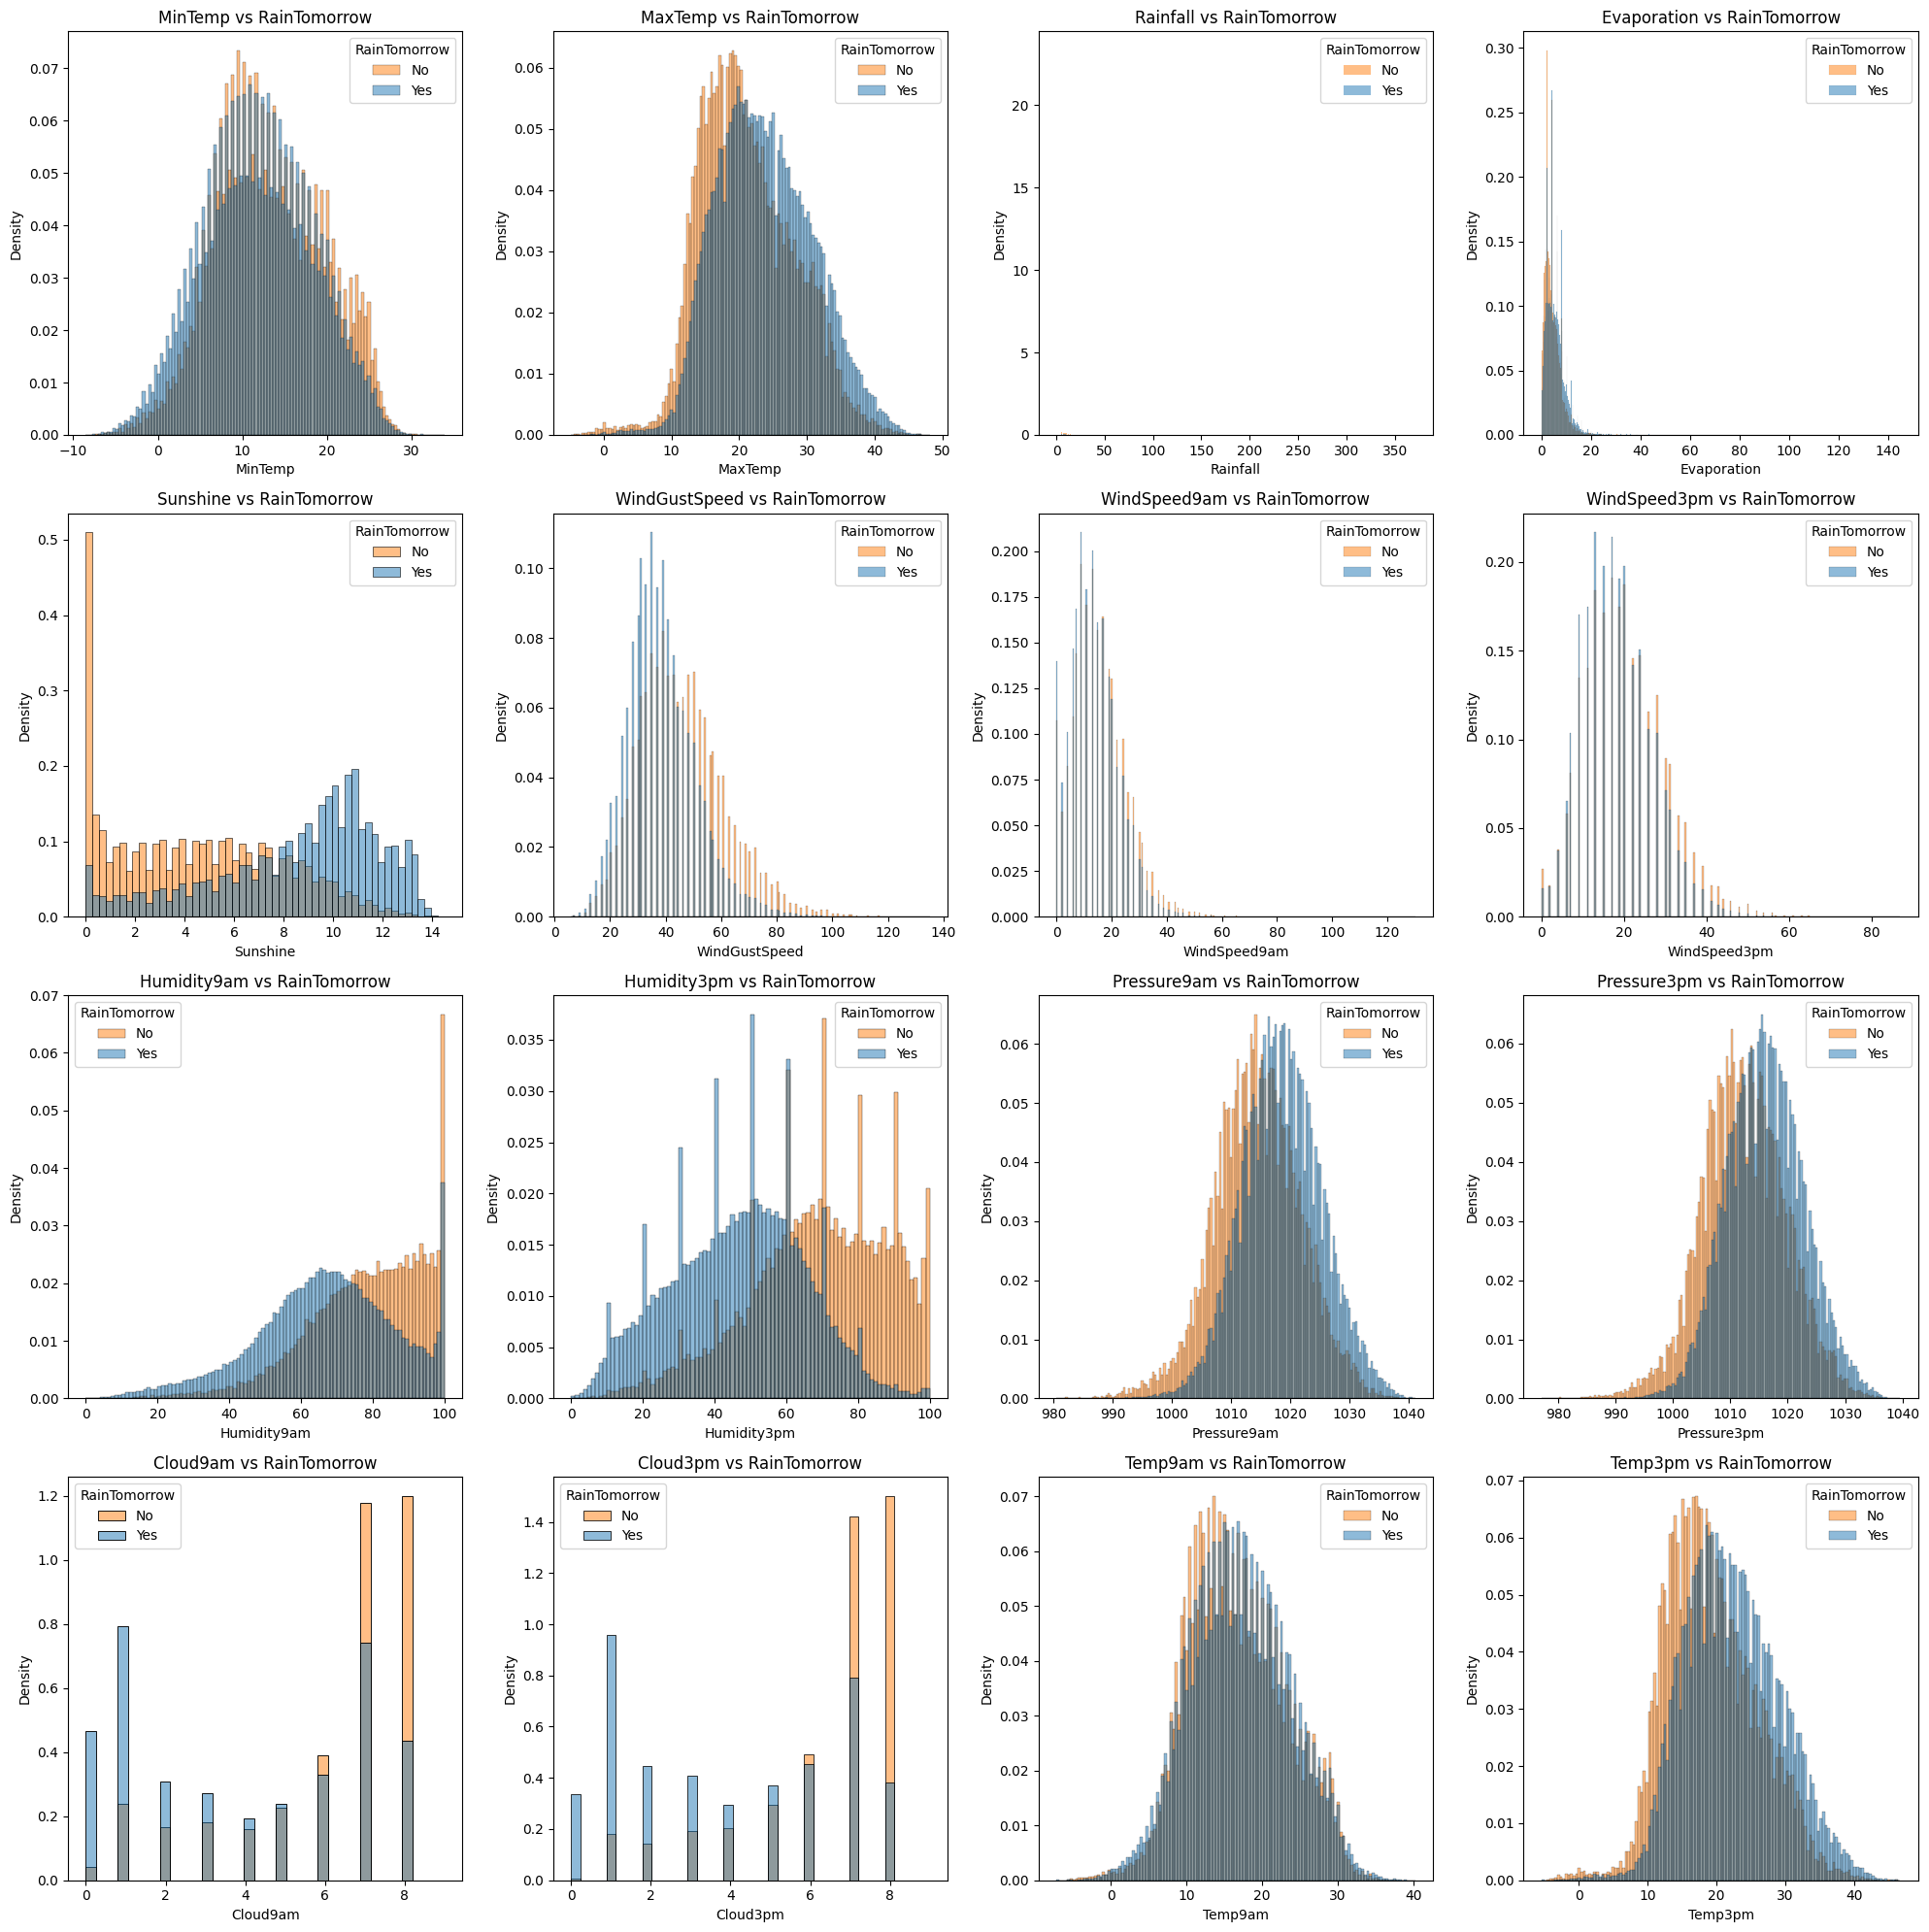

In [13]:
n_cols = 4
n_rows = (len(numerical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical):
    sns.histplot(data=df_numerical, x=feature, hue='RainTomorrow',
                 stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'{feature} vs RainTomorrow')
    axes[i].legend(title='RainTomorrow', labels=['No', 'Yes'])

for j in range(len(numerical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Графики признаков с выбросами имеют характерное *смещение (англ. skew)*. Для смещённых распределений, выбросы можно определить через *межквартильное расстояние (англ. Interquartile Range).*
$$
IQR = Q3 - Q1,
$$
где $Q3$ - третий квартиль, соответствующий порогу $75\%$, $Q1$ - первый квартиль, соответствующий порогу $25\%$.

Тогда выбросы определяют согласно правилу:
*  *Нижний выброс* - $x < Q1 - 1.5\cdot IQR$, $x$ - значение признака;
*  *Верхний выброс* - $x > Q3 + 1.5\cdot IQR$.

Если в результате получилось слишком много выбросов, значение $1.5$ можно увеличить, выделяя более "явные".

**Для полученных числовых признаков выделите соответствующие выбросы с помощью $IQR$ с коэффициентом 2**.

In [18]:
features_with_outliers = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

outliers = pd.DataFrame()

for feature in features_with_outliers:
    Q1 = df_numerical[feature].quantile(0.25)
    Q3 = df_numerical[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    outliers[feature] = (df_numerical[feature] < lower_bound) | (df_numerical[feature] > upper_bound)
outliers

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145454,False,False,False,False,False
145455,False,False,False,False,False
145456,False,False,False,False,False
145457,False,False,False,False,False


Есть 2 стратегии работы с выбросами:
*   Удалить соответствующий сэмпл;
*   Заменить его на среднее/медиану.

В первом приближении, удалим соответствующие примеры.

In [19]:
df_num_no_outliers = df_numerical[~outliers.any(axis=1)].reset_index(drop=True)

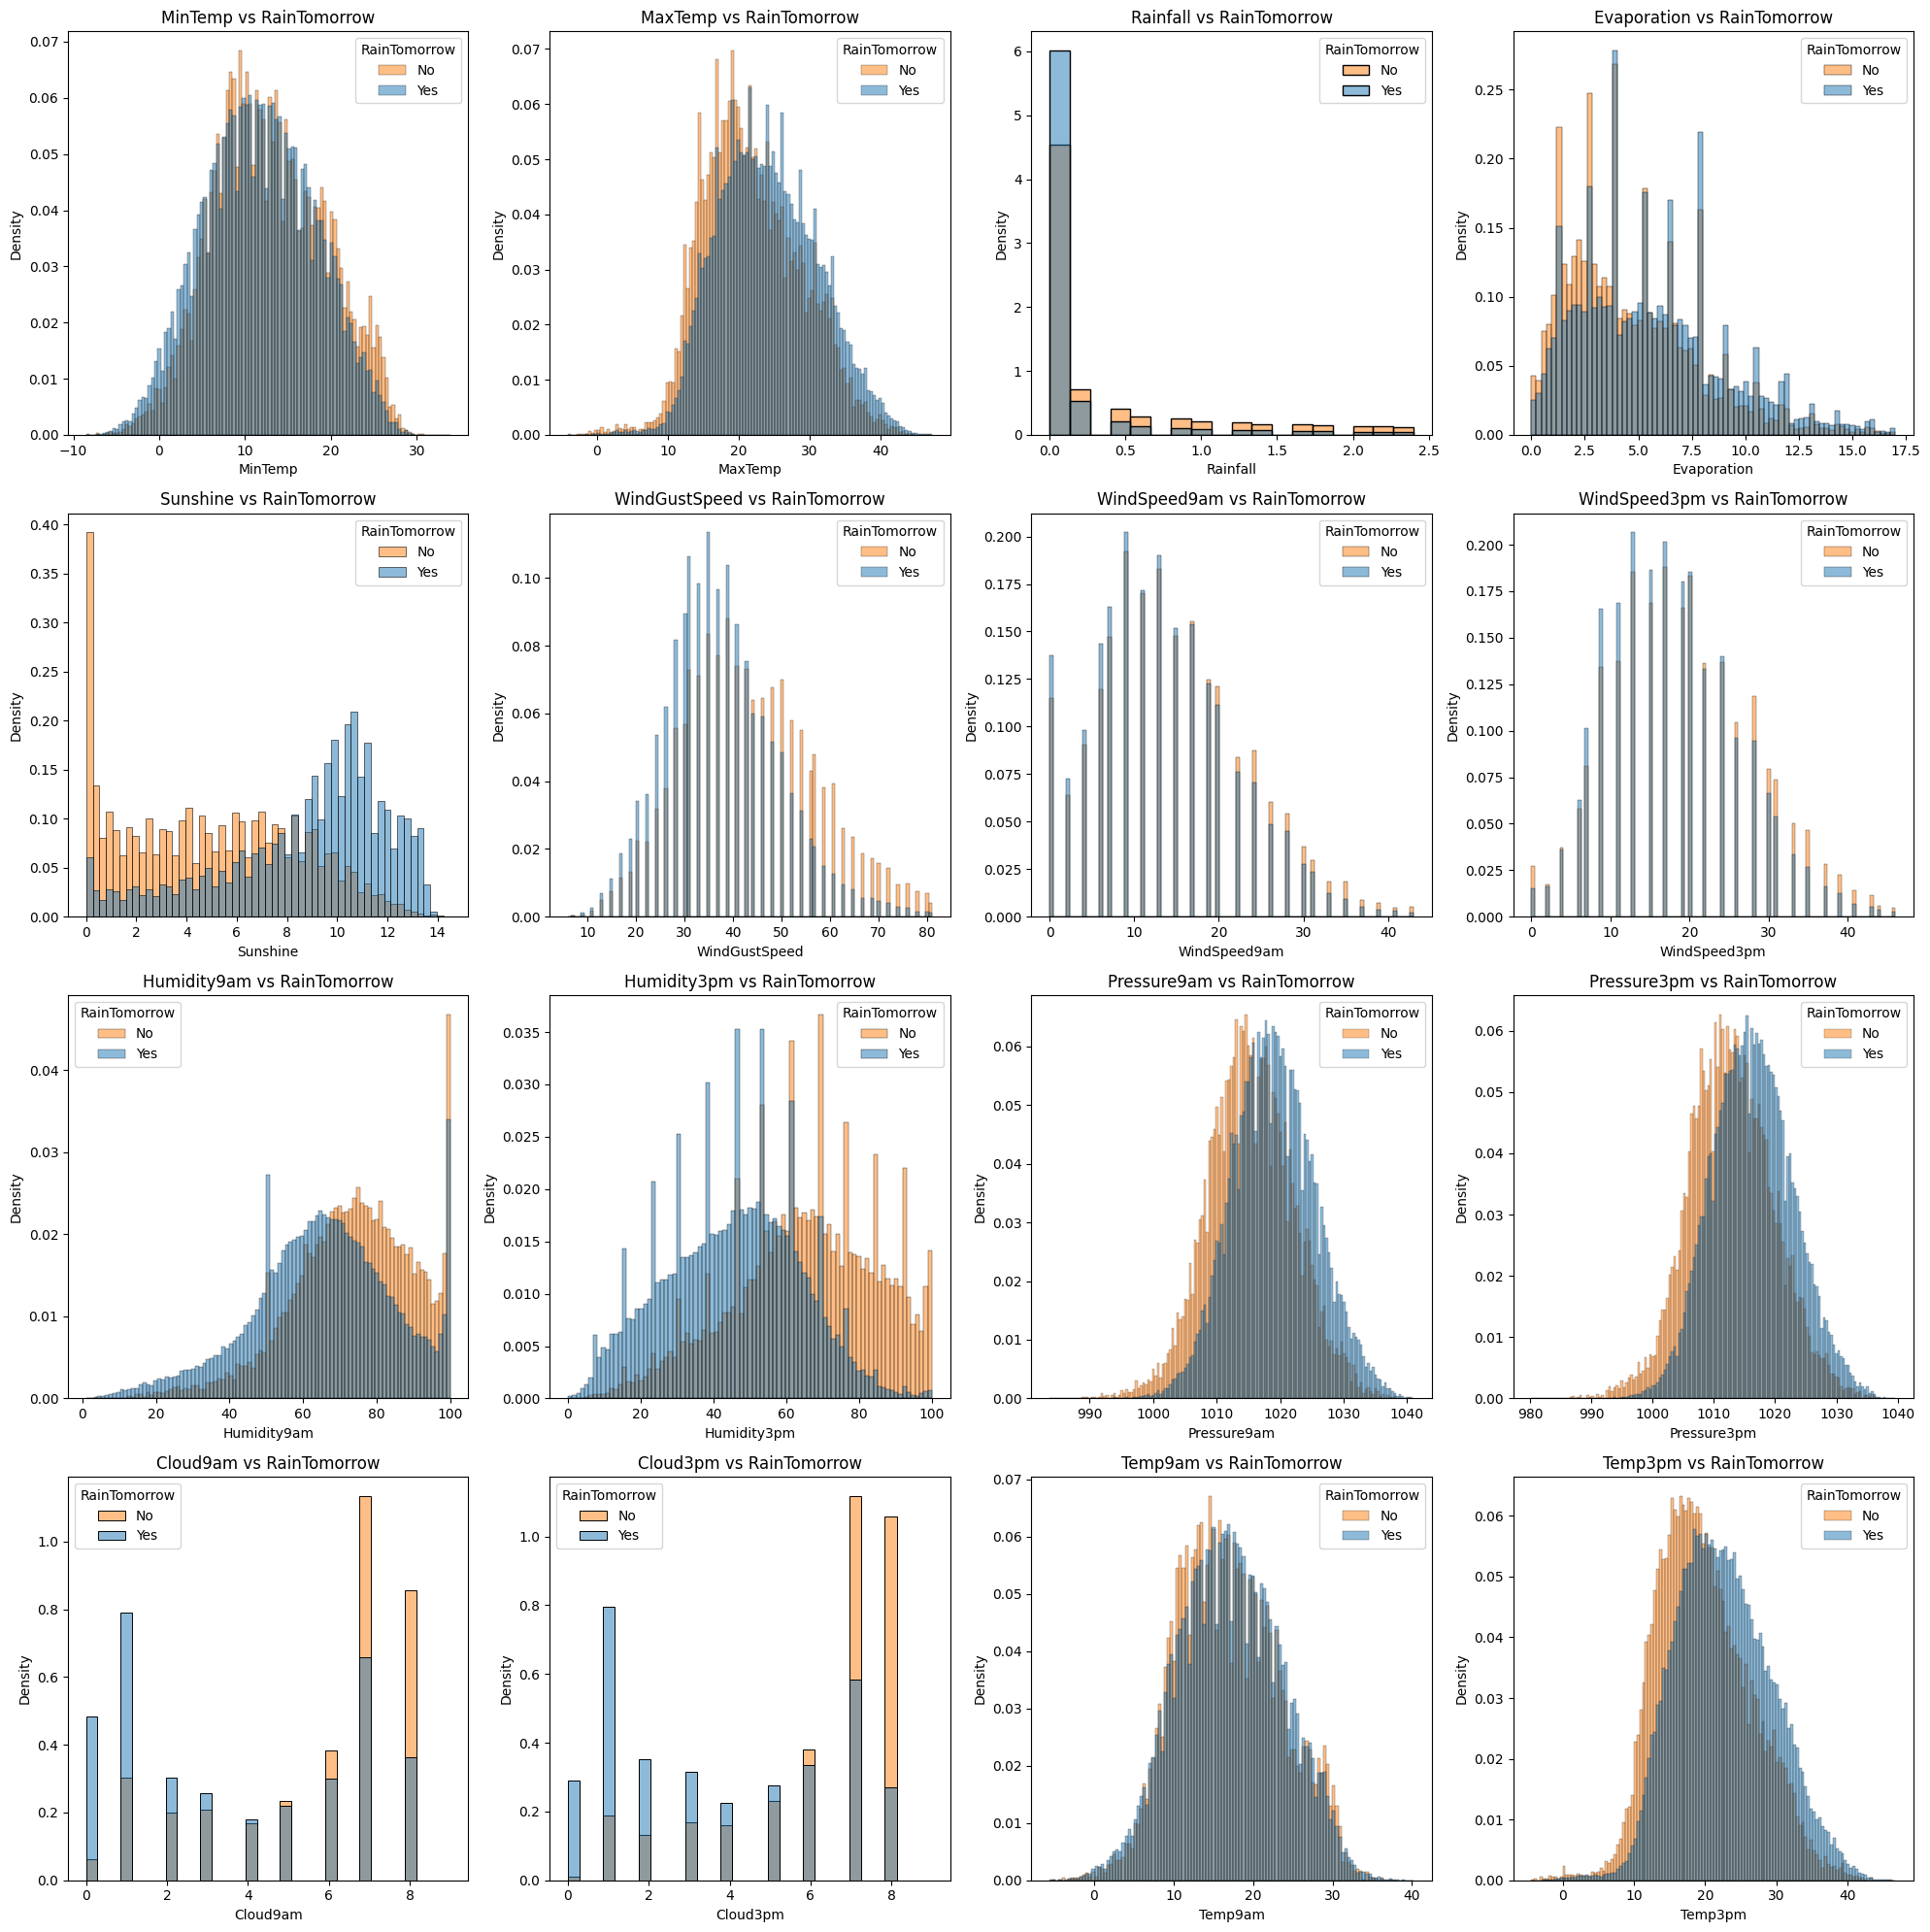

In [20]:
numerical = [var for var in df_num_no_outliers.columns if df[var].dtype!='O']

n_cols = 4
n_rows = (len(numerical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical):
    sns.histplot(data=df_num_no_outliers, x=feature, hue='RainTomorrow',
                 stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'{feature} vs RainTomorrow')
    axes[i].legend(title='RainTomorrow', labels=['No', 'Yes'])

for j in range(len(numerical), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Базовый анализ датасета почти закончен! Осталась пара шагов.

Выделим целевой признак в соответствующую переменную. Посмотрим на пропуски в обучающей выборке.

In [21]:
X = df_num_no_outliers.drop(['RainTomorrow'], axis=1)
y = df_num_no_outliers['RainTomorrow']
X.isnull().sum()

,0
MinTemp,550
MaxTemp,271
Rainfall,1369
Evaporation,49999
Sunshine,55761
WindGustSpeed,7355
WindSpeed9am,1151
WindSpeed3pm,2109
Humidity9am,1401
Humidity3pm,2859


Пропуски необходимо заполнить. Обычно это делают с помощью среднего/медианы. Мы воспользуемся медианой, так как она более устойчива к выбросам.

**Заполните пропуски в обучающей выборке медианой.**

In [23]:
X.fillna(X.median(), inplace=True)

Наконец, осталось провести нормализацию значений.

Разделим выборку на обучающую и тестовую, чтобы не учитывать масштаб на тесте.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000,93244.000000
mean,11.952810,23.758710,0.186872,5.267597,8.585151,38.444715,13.353781,18.111761,66.533364,48.573302,1018.389737,1015.745257,4.050491,4.118957,17.135114,22.218778,0.091620
std,6.438084,7.029507,0.469391,2.528337,2.668793,11.829369,8.263425,8.226810,18.608012,19.619496,6.416717,6.439696,2.258776,2.099170,6.507287,6.782712,0.326276
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,983.700000,980.200000,0.000000,0.000000,-5.300000,-4.400000,0.000000
25%,7.300000,18.500000,0.000000,4.400000,8.900000,31.000000,7.000000,13.000000,55.000000,35.000000,1014.300000,1011.600000,3.000000,3.000000,12.500000,17.300000,0.000000
50%,11.800000,23.200000,0.000000,5.000000,9.100000,37.000000,13.000000,17.000000,67.000000,49.000000,1018.300000,1015.600000,4.000000,4.000000,16.900000,21.700000,0.000000
75%,16.600000,28.700000,0.000000,5.600000,9.200000,44.000000,19.000000,24.000000,79.000000,62.000000,1022.300000,1019.800000,6.000000,5.000000,21.700000,26.800000,0.000000
max,33.900000,47.000000,2.400000,17.000000,14.500000,81.000000,43.000000,46.000000,100.000000,100.000000,1040.900000,1039.600000,9.000000,9.000000,40.200000,46.200000,2.000000


Для нормализации будем использовать `MinMaxScaler` модуля `sklearn.preprocessing`.

**Вам необходимо "обучить" (`fit`) scaler на `X_train` и использовать его на `X_test` (`transform`).**

**Примечание:** выходом `MinMaxScaler` является `np.array`. Чтобы в дальнейшем работать с выборкой, после масштабирования необходимо обратно перевести её в `pd.DataFrame`.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Задача 2 (5 баллов): Классификация



* Вам необходимо обучить обработанный датасет с помощью логистической регрессии.
* Вы можете пользоваться библиотекой `sklearn`
* Проведите классификацию с L1 и L2-регуляризацией. Какие признаки регуляризация lasso посчитала неинформативными?
* Проведите классификацию с регуляризацией [elasticnet](https://en.wikipedia.org/wiki/Elastic_net_regularization). Для этого воспользуйтесь поиском по сетке гиперпараметров (`GridSearchCV` модуля `sklearn.model_selection`). Пространство поиска определите константой `C = [1, 2, 5, 10, 100]` и значением `l1_ratio = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`.
* Сделайте выводы по полученым результатам




In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [62]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000, C=0.1)
logreg_l1.fit(X_train, y_train)

y_pred_l1 = logreg_l1.predict(X_test)
y_pred_proba_l1 = logreg_l1.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_l1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_l1):.4f}")

coefficients_l1 = logreg_l1.coef_[0]
non_zero_features_l1 = X_train.columns[coefficients_l1 != 0]
zero_features_l1 = X_train.columns[coefficients_l1 == 0]

print(f"\nКоличество ненулевых коэффициентов: {len(non_zero_features_l1)} из {len(coefficients_l1)}")

print("Ненулевые коэффициенты:")
for feature, coef in zip(non_zero_features_l1, coefficients_l1[coefficients_l1 != 0]):
    print(f"  {feature}: {coef:.4f}")

print("\nНулевые коэффициенты (неинформативные признаки):")
print(zero_features_l1.tolist())

Accuracy: 0.8658
ROC-AUC: 0.8447

Количество ненулевых коэффициентов: 12 из 17
Ненулевые коэффициенты:
  Rainfall: -0.1147
  Evaporation: -0.2462
  Sunshine: -1.4472
  WindGustSpeed: 3.8595
  WindSpeed9am: -0.5235
  WindSpeed3pm: -1.2648
  Humidity9am: 0.0658
  Humidity3pm: 5.1880
  Pressure9am: 4.9202
  Pressure3pm: -9.6204
  Cloud3pm: 1.2717
  RainToday: 1.2966

Нулевые коэффициенты (неинформативные признаки):
['MinTemp', 'MaxTemp', 'Cloud9am', 'Temp9am', 'Temp3pm']


In [66]:
logreg_l2 = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)
logreg_l2.fit(X_train, y_train)

y_pred_l2 = logreg_l2.predict(X_test)
y_pred_proba_l2 = logreg_l2.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_l2):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_l2):.4f}")

coefficients_l2 = logreg_l2.coef_[0]
print("\nКоэффициенты L2:")
for feature, coef in zip(X_train.columns, coefficients_l2):
    print(f"  {feature}: {coef:.4f}")

Accuracy: 0.8658
ROC-AUC: 0.8450

Коэффициенты L2:
  MinTemp: 0.0116
  MaxTemp: -0.5283
  Rainfall: -0.1645
  Evaporation: -0.2785
  Sunshine: -1.4553
  WindGustSpeed: 4.0384
  WindSpeed9am: -0.5510
  WindSpeed3pm: -1.3034
  Humidity9am: -0.0053
  Humidity3pm: 5.4800
  Pressure9am: 5.2592
  Pressure3pm: -9.8885
  Cloud9am: -0.0321
  Cloud3pm: 1.3152
  Temp9am: -0.5409
  Temp3pm: 1.2726
  RainToday: 1.3506


In [42]:
logreg_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42, max_iter=2000)

grid = {
    'C' : [1, 2, 5, 10, 100],
    'l1_ratio' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(
    logreg_elasticnet, grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC score: {grid_search.best_score_:.4f}")

best_elasticnet = grid_search.best_estimator_
y_pred_elasticnet = best_elasticnet.predict(X_test)
y_pred_proba_elasticnet = best_elasticnet.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_elasticnet):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_proba_elasticnet):.4f}")

coefficients_elasticnet = best_elasticnet.coef_[0]
non_zero_features_elasticnet = X_train.columns[coefficients_elasticnet != 0]
zero_features_elasticnet = X_train.columns[coefficients_elasticnet == 0]

print(f"\nКоличество ненулевых коэффициентов: {len(non_zero_features_elasticnet)} из {len(coefficients_elasticnet)}")
print("Ненулевые коэффициенты:")
for feature, coef in zip(non_zero_features_elasticnet, coefficients_elasticnet[coefficients_elasticnet != 0]):
    print(f"  {feature}: {coef:.4f}")

Fitting 5 folds for each of 55 candidates, totalling 275 fits
Лучшие параметры: {'C': 100, 'l1_ratio': 1.0}
Лучший ROC-AUC score: 0.8462
Test Accuracy: 0.8659
Test ROC-AUC: 0.8457

Количество ненулевых коэффициентов: 17 из 17
Ненулевые коэффициенты:
  MinTemp: -0.0512
  MaxTemp: -0.4920
  Rainfall: -0.1387
  Evaporation: -0.2155
  Sunshine: -1.4714
  WindGustSpeed: 4.0880
  WindSpeed9am: -0.5180
  WindSpeed3pm: -1.3363
  Humidity9am: 0.0580
  Humidity3pm: 5.4458
  Pressure9am: 7.3696
  Pressure3pm: -12.0568
  Cloud9am: -0.0214
  Cloud3pm: 1.3384
  Temp9am: -0.0906
  Temp3pm: 0.7283
  RainToday: 1.3778


In [67]:
print("СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ")
print("=" * 60)

models_comparison = {
    'L1 (Lasso)': {
        'accuracy': accuracy_score(y_test, y_pred_l1),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_l1)
    },
    'L2 (Ridge)': {
        'accuracy': accuracy_score(y_test, y_pred_l2),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_l2)
    },
    'ElasticNet (best)': {
        'accuracy': accuracy_score(y_test, y_pred_elasticnet),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_elasticnet)
    }
}

print("Метрики на тестовой выборке:")
print("Модель           | Accuracy | ROC-AUC")
print("-" * 55)
for model_name, metrics in models_comparison.items():
    print(f"{model_name:15} | {metrics['accuracy']:8.4f} | {metrics['roc_auc']:7.4f} ")

СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ
Метрики на тестовой выборке:
Модель           | Accuracy | ROC-AUC
-------------------------------------------------------
L1 (Lasso)      |   0.8658 |  0.8447 
L2 (Ridge)      |   0.8658 |  0.8450 
ElasticNet (best) |   0.8659 |  0.8457 


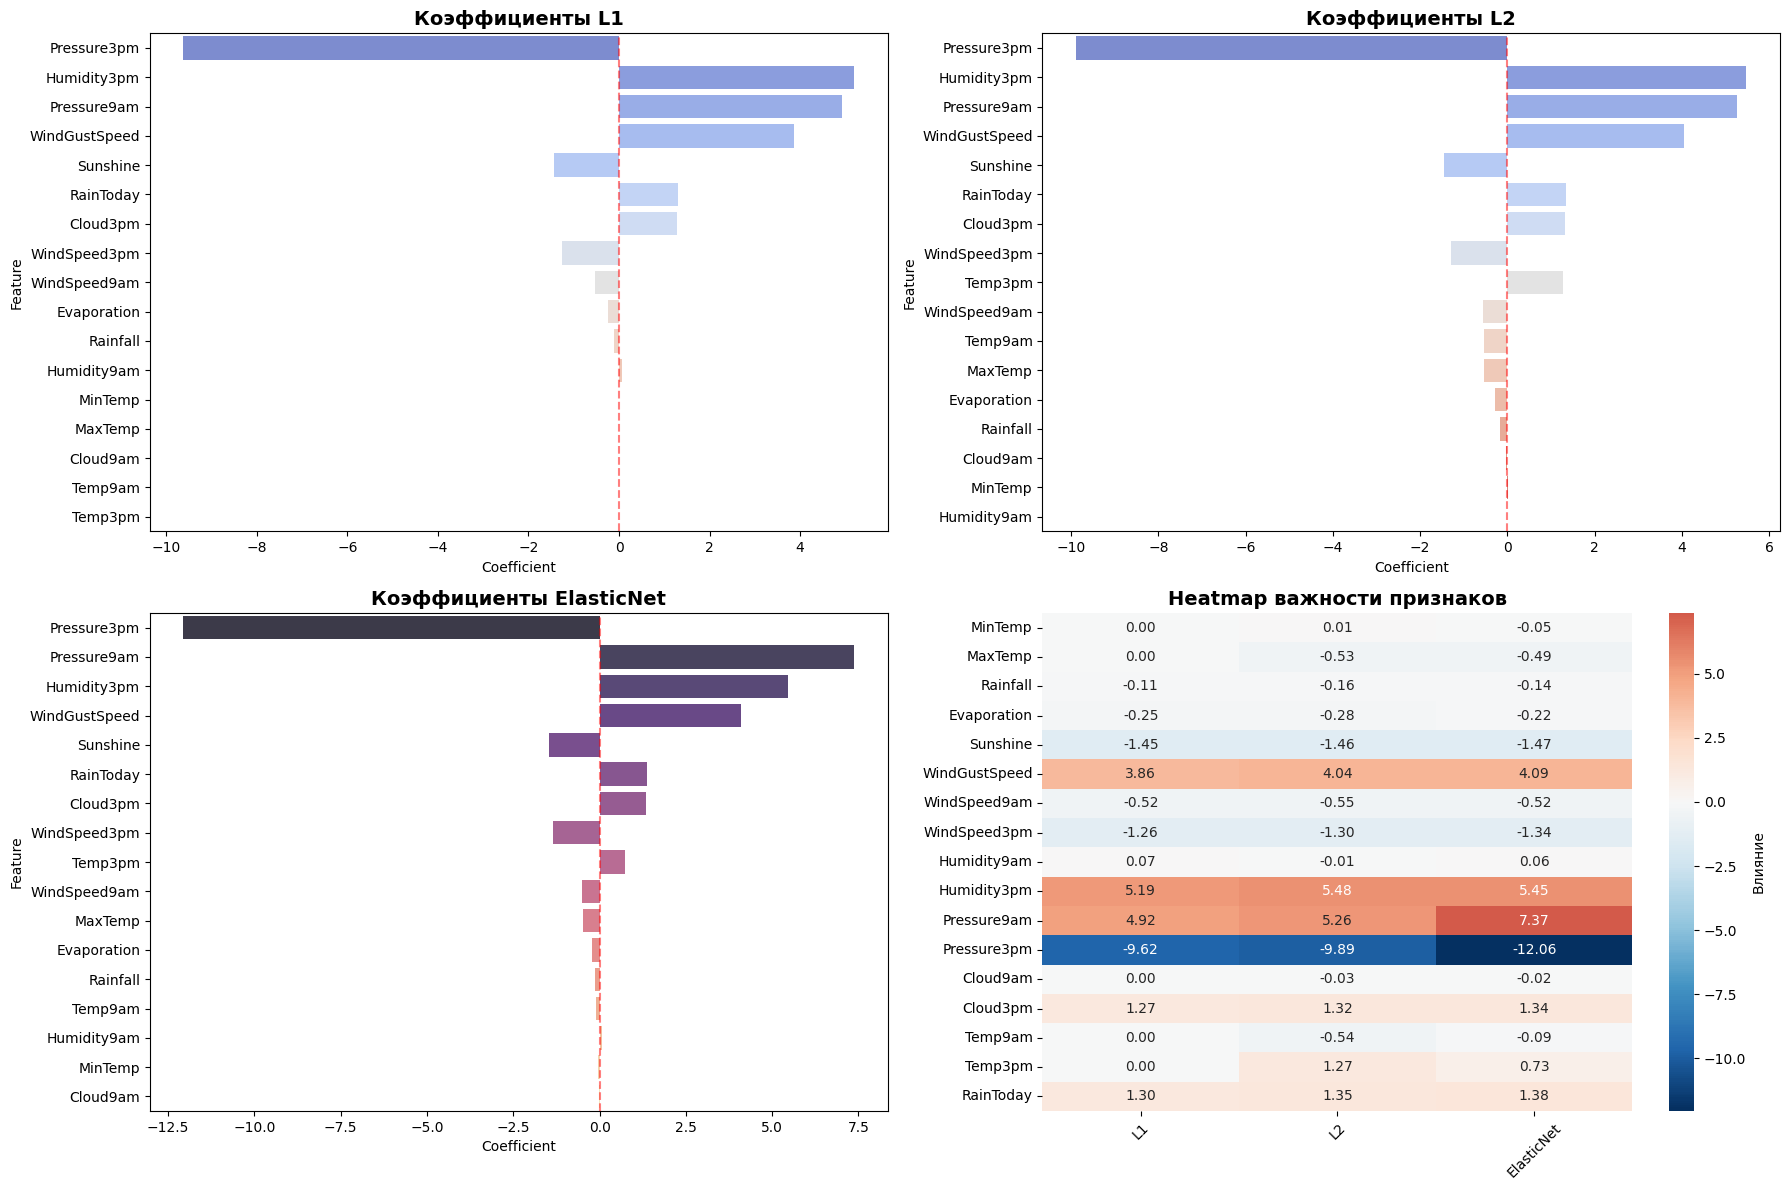

In [70]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
l1_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_l1
}).sort_values('Coefficient', key=abs, ascending=False)

sns.barplot(data=l1_importance, y='Feature', x='Coefficient', hue='Feature',
            palette='coolwarm', alpha=0.8, legend=False)
plt.title('Коэффициенты L1', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.subplot(2, 2, 2)
l2_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_l2
}).sort_values('Coefficient', key=abs, ascending=False)

sns.barplot(data=l2_importance, y='Feature', x='Coefficient', hue='Feature',
            palette='coolwarm', alpha=0.8, legend=False)
plt.title('Коэффициенты L2', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.subplot(2, 2, 3)
elasticnet_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_elasticnet
}).sort_values('Coefficient', key=abs, ascending=False)

sns.barplot(data=elasticnet_importance, y='Feature', x='Coefficient', hue='Feature',
            palette='magma', alpha=0.8, legend=False)
plt.title('Коэффициенты ElasticNet', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.subplot(2, 2, 4)
importance_matrix = pd.DataFrame({
    'L1': coefficients_l1,
    'L2': coefficients_l2,
    'ElasticNet': coefficients_elasticnet
}, index=X_train.columns)

sns.heatmap(importance_matrix, cmap='RdBu_r', center=0,
            annot=True, fmt='.2f', cbar_kws={'label': 'Влияние'})
plt.title('Heatmap важности признаков', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Все модели примерно одинаково выделили наиболее существенные признаки, наиболее важными оказались давление в 3 часа дня и 9 утра, влажность в 3 часа дня и скорость порывов ветра. По меетрикам Accuracy и ROC-AUC модели совпадаются с точностью до тысячных.

### Задача 3* (2 балла): Категориальные признаки

* В ходе анализа датасета было сделано несколько упрощений:
    * Категориальные признаки были опущены (`df --> df_numerical`);
    * Выбросы были опущены (`df_numerical --> df_num_no_outliers`).
* Необходимо провести обработку категориальных признаков.
* Протестировать качество логистической регрессии и подобрать гиперпараметры на различных вариантах:
    * С категориальными признаками и без учета выбросов;
    * Без категориальных признаков, с учетом выбросов;
    * С категориальными признаками, с учетом выбросов.
* Поощряется изобретательность. Возможно, какие-то категориальные/численные признаки покажутся менее инфомативными.


* P.S. Не расстраивайтесь, если выдвигаемые гипотезы не дадут прибавки в качестве. Важен сам пайплайн проверки выдвигаемых гипотез)

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################